# Stage 1 : Exploratory Data Analysis

## 1.1 Import Library & Load Data

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from textwrap import wrap
from matplotlib import rcParams

sns.set_style('darkgrid')
pal = sns.color_palette()

from scipy import stats

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [2]:
df = pd.read_csv('marketing_campaign_data.csv')
df

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,0,5524,1957,S1,Lajang,58138000.0,0,0,04-09-2012,58,...,7,0,0,0,0,0,0,3,11,1
1,1,2174,1954,S1,Lajang,46344000.0,1,1,08-03-2014,38,...,5,0,0,0,0,0,0,3,11,0
2,2,4141,1965,S1,Bertunangan,71613000.0,0,0,21-08-2013,26,...,4,0,0,0,0,0,0,3,11,0
3,3,6182,1984,S1,Bertunangan,26646000.0,1,0,10-02-2014,26,...,6,0,0,0,0,0,0,3,11,0
4,4,5324,1981,S3,Menikah,58293000.0,1,0,19-01-2014,94,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,2235,10870,1967,S1,Menikah,61223000.0,0,1,13-06-2013,46,...,5,0,0,0,0,0,0,3,11,0
2236,2236,4001,1946,S3,Bertunangan,64014000.0,2,1,10-06-2014,56,...,7,0,0,0,1,0,0,3,11,0
2237,2237,7270,1981,S1,Cerai,56981000.0,0,0,25-01-2014,91,...,6,0,1,0,0,0,0,3,11,0
2238,2238,8235,1956,S2,Bertunangan,69245000.0,0,1,24-01-2014,8,...,3,0,0,0,0,0,0,3,11,0


## 1.2 Descriptive Statistics

### a. Missing Value

In [3]:
#General Information & Missing Value Check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           2240 non-null   int64  
 1   ID                   2240 non-null   int64  
 2   Year_Birth           2240 non-null   int64  
 3   Education            2240 non-null   object 
 4   Marital_Status       2240 non-null   object 
 5   Income               2216 non-null   float64
 6   Kidhome              2240 non-null   int64  
 7   Teenhome             2240 non-null   int64  
 8   Dt_Customer          2240 non-null   object 
 9   Recency              2240 non-null   int64  
 10  MntCoke              2240 non-null   int64  
 11  MntFruits            2240 non-null   int64  
 12  MntMeatProducts      2240 non-null   int64  
 13  MntFishProducts      2240 non-null   int64  
 14  MntSweetProducts     2240 non-null   int64  
 15  MntGoldProds         2240 non-null   i

Terdapat kolom yang hilang atau missing value yaitu pada kolom "Income"

### b. Duplicate Value Check

In [4]:
df.duplicated().sum()

0

Tidak ada data yang duplikat

### c. Statistical Summay

In [5]:
df.describe()

,Unnamed: 0,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,MntMeatProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2240.000000,2.216000e+03,2240.000000,2240.000000,2240.000000,2.240000e+03,2240.000000,2.240000e+03,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,1119.500000,5592.159821,1968.805804,5.224725e+07,0.444196,0.506250,49.109375,3.039357e+05,26302.232143,1.669500e+05,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,646.776623,3246.662198,11.984069,2.517308e+07,0.538398,0.544538,28.962453,3.365974e+05,39773.433765,2.257154e+05,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,0.000000,1893.000000,1.730000e+06,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,559.750000,2828.250000,1959.000000,3.530300e+07,0.000000,0.000000,24.000000,2.375000e+04,1000.000000,1.600000e+04,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,1119.500000,5458.500000,1970.000000,5.138150e+07,0.000000,0.000000,49.000000,1.735000e+05,8000.000000,6.700000e+04,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,1679.250000,8427.750000,1977.000000,6.852200e+07,1.000000,1.000000,74.000000,5.042500e+05,33000.000000,2.320000e+05,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,2239.000000,11191.000000,1996.000000,6.666660e+08,2.000000,2.000000,99.000000,1.493000e+06,199000.000000,1.725000e+06,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


Note :
- Nilai mean (rata2) yang terlalu jauh dengan nilai quartile 2 (50%) menandakan ada outlier
- Perhatikan nilai Q3 dan nilai max, jika terlalu jauh berarti ada outlier

#### 

In [6]:
df.describe()

,Unnamed: 0,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,MntMeatProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2240.000000,2.216000e+03,2240.000000,2240.000000,2240.000000,2.240000e+03,2240.000000,2.240000e+03,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,1119.500000,5592.159821,1968.805804,5.224725e+07,0.444196,0.506250,49.109375,3.039357e+05,26302.232143,1.669500e+05,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,646.776623,3246.662198,11.984069,2.517308e+07,0.538398,0.544538,28.962453,3.365974e+05,39773.433765,2.257154e+05,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,0.000000,1893.000000,1.730000e+06,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,559.750000,2828.250000,1959.000000,3.530300e+07,0.000000,0.000000,24.000000,2.375000e+04,1000.000000,1.600000e+04,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,1119.500000,5458.500000,1970.000000,5.138150e+07,0.000000,0.000000,49.000000,1.735000e+05,8000.000000,6.700000e+04,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,1679.250000,8427.750000,1977.000000,6.852200e+07,1.000000,1.000000,74.000000,5.042500e+05,33000.000000,2.320000e+05,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,2239.000000,11191.000000,1996.000000,6.666660e+08,2.000000,2.000000,99.000000,1.493000e+06,199000.000000,1.725000e+06,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


### Descriptive Statistics Summary :

## 1.3 Univariate Analysis

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           2240 non-null   int64  
 1   ID                   2240 non-null   int64  
 2   Year_Birth           2240 non-null   int64  
 3   Education            2240 non-null   object 
 4   Marital_Status       2240 non-null   object 
 5   Income               2216 non-null   float64
 6   Kidhome              2240 non-null   int64  
 7   Teenhome             2240 non-null   int64  
 8   Dt_Customer          2240 non-null   object 
 9   Recency              2240 non-null   int64  
 10  MntCoke              2240 non-null   int64  
 11  MntFruits            2240 non-null   int64  
 12  MntMeatProducts      2240 non-null   int64  
 13  MntFishProducts      2240 non-null   int64  
 14  MntSweetProducts     2240 non-null   int64  
 15  MntGoldProds         2240 non-null   i

In [8]:
df.columns

Index(['Unnamed: 0', 'ID', 'Year_Birth', 'Education', 'Marital_Status',
       'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntCoke',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [9]:
obj = df.select_dtypes(include='object').columns
obj

Index(['Education', 'Marital_Status', 'Dt_Customer'], dtype='object')

In [10]:
num = df.select_dtypes(include=['int64','float64']).columns
num

Index(['Unnamed: 0', 'ID', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'MntCoke', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact',
       'Z_Revenue', 'Response'],
      dtype='object')

In [11]:
len(num)

27

In [12]:
#separate columns by numericals and categoricals
categoricals = obj
numericals = num

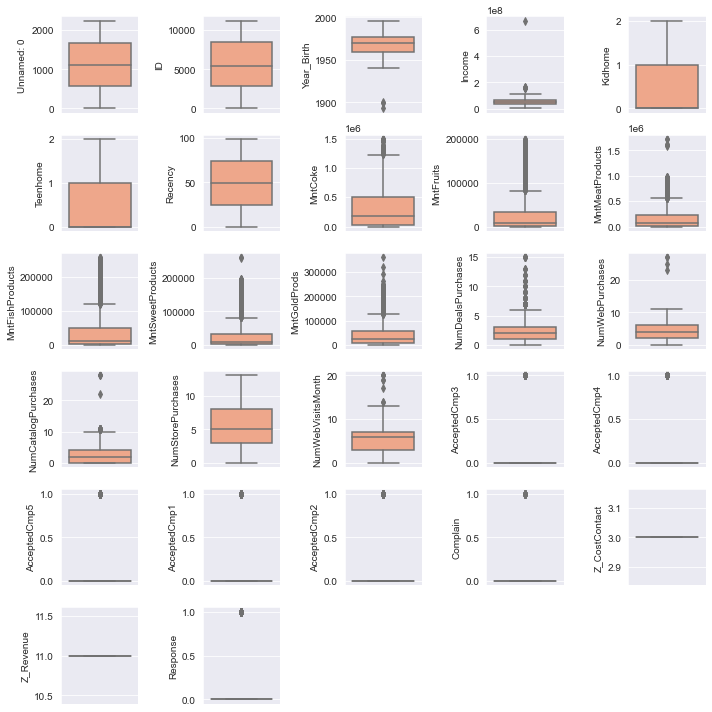

In [13]:
#Boxplot
feat_num = numericals
plt.figure(figsize=(10,10))
for i in range(len(feat_num)):
    plt.subplot(6,5,i+1)
    sns.boxplot(y=df[feat_num[i]], color = 'lightsalmon',orient='v')
    plt.tight_layout()

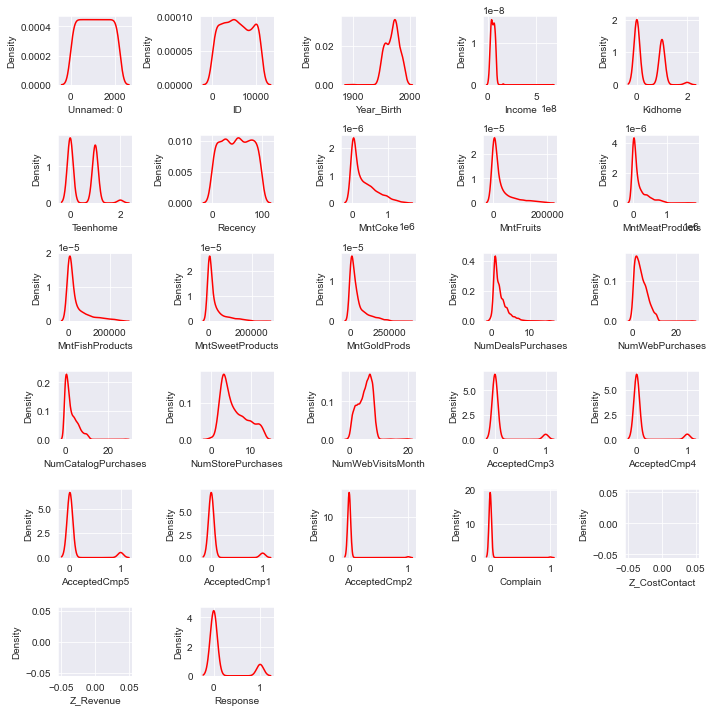

In [14]:
#Distplot
plt.figure(figsize=(10,10))
for i in range(len(feat_num)):
    plt.subplot(6,5,i+1)
    sns.kdeplot(x=df[feat_num[i]],color='red')
    plt.xlabel(feat_num[i])
    plt.tight_layout()


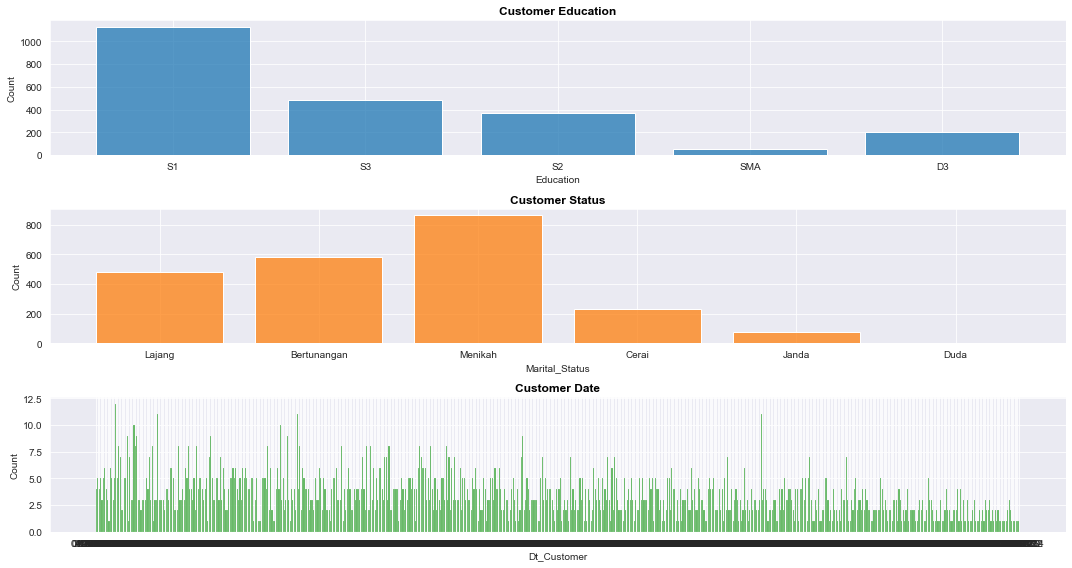

In [15]:
#countplot
plt.figure(figsize=(15,8))
feat_cat = categoricals
title = ['Customer Education','Customer Status','Customer Date']
for i in range(len(feat_cat)):
    plt.subplot(3,1,i+1)
    sns.histplot(df[feat_cat[i]],color=pal[i],shrink=0.8)
    plt.tight_layout()
    plt.title(title[i],fontsize = 12, color = 'black', fontweight = 'semibold')    

## 1.4 Multivariate Analysis

<AxesSubplot:>

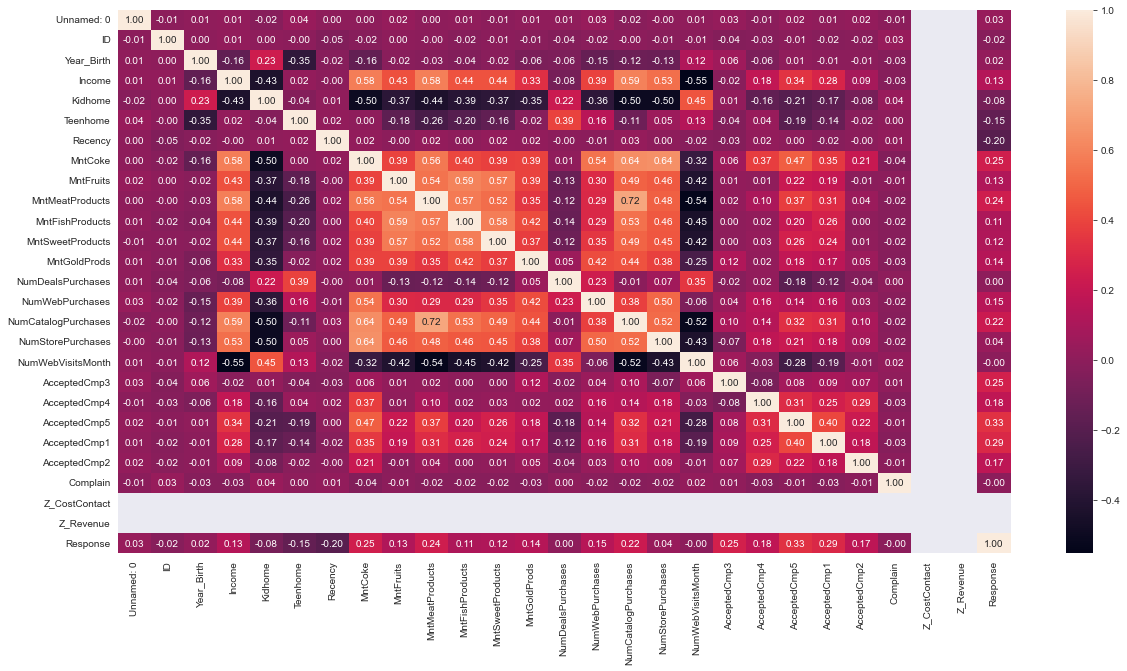

In [16]:
#Correlation for each numerical features
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot = True, fmt='.2f')

In [17]:
df['Z_CostContact']

0       3
1       3
2       3
3       3
4       3
       ..
2235    3
2236    3
2237    3
2238    3
2239    3
Name: Z_CostContact, Length: 2240, dtype: int64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           2240 non-null   int64  
 1   ID                   2240 non-null   int64  
 2   Year_Birth           2240 non-null   int64  
 3   Education            2240 non-null   object 
 4   Marital_Status       2240 non-null   object 
 5   Income               2216 non-null   float64
 6   Kidhome              2240 non-null   int64  
 7   Teenhome             2240 non-null   int64  
 8   Dt_Customer          2240 non-null   object 
 9   Recency              2240 non-null   int64  
 10  MntCoke              2240 non-null   int64  
 11  MntFruits            2240 non-null   int64  
 12  MntMeatProducts      2240 non-null   int64  
 13  MntFishProducts      2240 non-null   int64  
 14  MntSweetProducts     2240 non-null   int64  
 15  MntGoldProds         2240 non-null   i

## 1.5 Business Insight

In [19]:
df

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,0,5524,1957,S1,Lajang,58138000.0,0,0,04-09-2012,58,...,7,0,0,0,0,0,0,3,11,1
1,1,2174,1954,S1,Lajang,46344000.0,1,1,08-03-2014,38,...,5,0,0,0,0,0,0,3,11,0
2,2,4141,1965,S1,Bertunangan,71613000.0,0,0,21-08-2013,26,...,4,0,0,0,0,0,0,3,11,0
3,3,6182,1984,S1,Bertunangan,26646000.0,1,0,10-02-2014,26,...,6,0,0,0,0,0,0,3,11,0
4,4,5324,1981,S3,Menikah,58293000.0,1,0,19-01-2014,94,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,2235,10870,1967,S1,Menikah,61223000.0,0,1,13-06-2013,46,...,5,0,0,0,0,0,0,3,11,0
2236,2236,4001,1946,S3,Bertunangan,64014000.0,2,1,10-06-2014,56,...,7,0,0,0,1,0,0,3,11,0
2237,2237,7270,1981,S1,Cerai,56981000.0,0,0,25-01-2014,91,...,6,0,1,0,0,0,0,3,11,0
2238,2238,8235,1956,S2,Bertunangan,69245000.0,0,1,24-01-2014,8,...,3,0,0,0,0,0,0,3,11,0


In [20]:
df.groupby(['Education'])['ID'].nunique()

Education
D3      203
S1     1127
S2      370
S3      486
SMA      54
Name: ID, dtype: int64

In [21]:
df_ed = df[df['Response'] == 1]

In [22]:
df_ed

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,0,5524,1957,S1,Lajang,58138000.0,0,0,04-09-2012,58,...,7,0,0,0,0,0,0,3,11,1
8,8,4855,1974,S3,Bertunangan,30351000.0,1,0,06-06-2013,19,...,9,0,0,0,0,0,0,3,11,1
15,15,2114,1946,S3,Lajang,82800000.0,0,0,24-11-2012,23,...,3,0,0,1,1,0,0,3,11,1
33,33,7373,1952,S3,Cerai,46610000.0,0,2,29-10-2012,8,...,6,0,0,0,0,0,0,3,11,1
39,39,2968,1943,S3,Cerai,48948000.0,0,0,01-02-2013,53,...,6,1,0,0,0,0,0,3,11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2194,2194,7118,1957,S1,Menikah,73803000.0,0,1,01-08-2012,61,...,6,1,0,0,0,0,0,3,11,1
2198,2198,2632,1954,S1,Menikah,50501000.0,1,1,18-06-2013,10,...,6,1,0,0,0,0,0,3,11,1
2202,2202,11133,1973,S3,Lajang,48432000.0,0,1,18-10-2012,3,...,8,0,0,0,0,0,0,3,11,1
2221,2221,7366,1982,S2,Lajang,75777000.0,0,0,04-07-2013,12,...,1,0,1,1,0,0,0,3,11,1


In [23]:
df_ed2 = df_ed.groupby(['Education']).agg({'Response' : 'count'}).reset_index()
df_ed2

,Education,Response
0,D3,22
1,S1,152
2,S2,57
3,S3,101
4,SMA,2


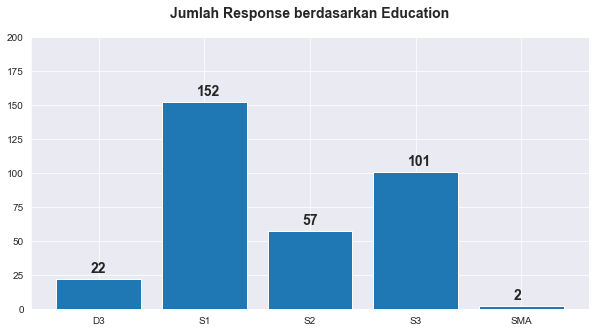

In [24]:
plt.figure(figsize=(10,5))
plt.bar(x='Education',height='Response',data = df_ed2)
plt.title('Jumlah Response berdasarkan Education',fontsize=14,fontweight='semibold',y=1.05)
x = df_ed2['Education']
y = df_ed2['Response']
plt.ylim(0,200)

anotasi = range(len(x))
for i in anotasi:
    plt.text(x = anotasi[i]-0.075, y = y[i]+5, s = round(y[i],2), fontsize=14, fontweight='semibold')
    
plt.show()

In [25]:
df_ed3 = df_ed.groupby(['Marital_Status']).agg({'Response' : 'count'}).reset_index()
df_ed3

,Marital_Status,Response
0,Bertunangan,60
1,Cerai,48
2,Duda,1
3,Janda,19
4,Lajang,108
5,Menikah,98


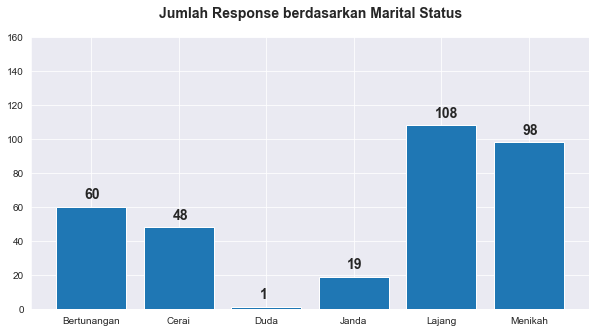

In [26]:
plt.figure(figsize=(10,5))
plt.bar(x='Marital_Status',height='Response',data=df_ed3)

x=df_ed3['Marital_Status']
y=df_ed3['Response']
plt.title('Jumlah Response berdasarkan Marital Status',y=1.05,fontweight='semibold',fontsize=14)
plt.ylim(0,160)

anotasi = range(len(x))
for i in anotasi:
    plt.text(x = anotasi[i]-0.075, y = y[i]+5, s = round(y[i],2), fontsize=14, fontweight='semibold')

plt.show()

#### 

#### 

# Stage 2 : Data Pre-Processing

In [27]:
df.columns

Index(['Unnamed: 0', 'ID', 'Year_Birth', 'Education', 'Marital_Status',
       'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntCoke',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [28]:
df.shape

(2240, 30)

## 2.1 Data Cleaning

### a. Handle Duplicated Data

In [29]:
#melihat data yang duplikat
df.duplicated().sum()

0

In [30]:
#menghapus data duplikat 
# df.drop_duplicates()

Tidak ada data duplikat

### b. Handle Missing Value (Nan & Null)

In [31]:
#melihat data yang bernilai NAN (Not a Number) atau Null (Kosong) 
df.isna().sum()

Unnamed: 0              0
ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntCoke                 0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [32]:
#menghitung banyak kolom
df.isna().any().count()

30

In [33]:
#mencari kolom yang memiliki nilai NaN 
df.columns[df.isna().any()].tolist()

['Income']

#### 

In [34]:
df.isnull().sum()

Unnamed: 0              0
ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntCoke                 0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [35]:
#menghapus baris yang bernilai NaN atau Null
df = df.dropna(subset=['Income'])

In [36]:
df.isna().sum()

Unnamed: 0             0
ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntCoke                0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [37]:
#menghapus kolom
# df.drop(['company'],axis=1)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           2216 non-null   int64  
 1   ID                   2216 non-null   int64  
 2   Year_Birth           2216 non-null   int64  
 3   Education            2216 non-null   object 
 4   Marital_Status       2216 non-null   object 
 5   Income               2216 non-null   float64
 6   Kidhome              2216 non-null   int64  
 7   Teenhome             2216 non-null   int64  
 8   Dt_Customer          2216 non-null   object 
 9   Recency              2216 non-null   int64  
 10  MntCoke              2216 non-null   int64  
 11  MntFruits            2216 non-null   int64  
 12  MntMeatProducts      2216 non-null   int64  
 13  MntFishProducts      2216 non-null   int64  
 14  MntSweetProducts     2216 non-null   int64  
 15  MntGoldProds         2216 non-null   i

### c. Handle Formatting (Data Type)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           2216 non-null   int64  
 1   ID                   2216 non-null   int64  
 2   Year_Birth           2216 non-null   int64  
 3   Education            2216 non-null   object 
 4   Marital_Status       2216 non-null   object 
 5   Income               2216 non-null   float64
 6   Kidhome              2216 non-null   int64  
 7   Teenhome             2216 non-null   int64  
 8   Dt_Customer          2216 non-null   object 
 9   Recency              2216 non-null   int64  
 10  MntCoke              2216 non-null   int64  
 11  MntFruits            2216 non-null   int64  
 12  MntMeatProducts      2216 non-null   int64  
 13  MntFishProducts      2216 non-null   int64  
 14  MntSweetProducts     2216 non-null   int64  
 15  MntGoldProds         2216 non-null   i

In [40]:
#melihat tipe data setiap kolom
df.dtypes

Unnamed: 0               int64
ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntCoke                  int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

In [41]:
df.select_dtypes('object').columns

Index(['Education', 'Marital_Status', 'Dt_Customer'], dtype='object')

In [42]:
df.select_dtypes('float').columns

Index(['Income'], dtype='object')

In [43]:
df.select_dtypes('int').columns

Index(['Unnamed: 0', 'ID', 'Year_Birth', 'Kidhome', 'Teenhome', 'Recency',
       'MntCoke', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact',
       'Z_Revenue', 'Response'],
      dtype='object')

In [44]:
#melihat kolom dengan tipe data objek dan jumlah nilai uniknya
df.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

Education           5
Marital_Status      6
Dt_Customer       662
dtype: int64

In [45]:
#melihat kolom dengan tipe data int dan jumlah nilai uniknya
df.select_dtypes('int').apply(pd.Series.nunique, axis = 0)

Unnamed: 0             2216
ID                     2216
Year_Birth               59
Kidhome                   3
Teenhome                  3
Recency                 100
MntCoke                 776
MntFruits               158
MntMeatProducts         554
MntFishProducts         182
MntSweetProducts        176
MntGoldProds            212
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

In [46]:
#melihat data dengan tipe data float dengan nilai uniknya 
df.select_dtypes('float').apply(pd.Series.nunique, axis = 0)

Income    1974
dtype: int64

### d. Handle Invalid Values

In [47]:
#perulangan untuk melihat value counts untuk kolom dengan tipe data categoricals
feat_cat = categoricals

for i in feat_cat:
    print(i)
    print(df[i].value_counts())
    print(' ')

Education
S1     1116
S3      481
S2      365
D3      200
SMA      54
Name: Education, dtype: int64
 
Marital_Status
Menikah        857
Bertunangan    573
Lajang         475
Cerai          232
Janda           76
Duda             3
Name: Marital_Status, dtype: int64
 
Dt_Customer
31-08-2012    12
12-09-2012    11
14-02-2013    11
12-05-2014    11
20-08-2013    10
              ..
05-08-2012     1
18-11-2012     1
09-05-2014     1
26-06-2013     1
09-01-2014     1
Name: Dt_Customer, Length: 662, dtype: int64
 


In [48]:
#perulangan untuk melihat value counts untuk kolom dengan tipe data numericals
feat_num = numericals

for i in feat_num:
    print(i)
    print(df[i].value_counts())
    print(' ')

Unnamed: 0
0       1
1496    1
1490    1
1491    1
1492    1
       ..
746     1
745     1
744     1
743     1
2239    1
Name: Unnamed: 0, Length: 2216, dtype: int64
 
ID
5524    1
6885    1
3478    1
7494    1
1763    1
       ..
7235    1
3560    1
5278    1
7761    1
9405    1
Name: ID, Length: 2216, dtype: int64
 
Year_Birth
1976    89
1971    86
1975    83
1972    78
1978    76
1970    75
1965    74
1973    72
1969    70
1974    69
1956    55
1979    53
1958    52
1977    52
1952    52
1968    51
1966    50
1959    50
1954    49
1960    49
1955    48
1982    44
1963    44
1962    44
1967    44
1951    42
1983    41
1986    41
1957    41
1964    41
1980    39
1981    38
1984    38
1961    35
1953    35
1985    32
1949    30
1989    29
1988    29
1950    29
1987    27
1948    21
1990    18
1946    16
1947    16
1991    15
1992    13
1945     8
1944     7
1943     6
1995     5
1993     5
1994     3
1996     2
1899     1
1941     1
1893     1
1900     1
1940     1
Name: Year_Birth, dt

In [49]:
df.shape

(2216, 30)

#### 

### e. Handle Outliers

In [50]:
df

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,0,5524,1957,S1,Lajang,58138000.0,0,0,04-09-2012,58,...,7,0,0,0,0,0,0,3,11,1
1,1,2174,1954,S1,Lajang,46344000.0,1,1,08-03-2014,38,...,5,0,0,0,0,0,0,3,11,0
2,2,4141,1965,S1,Bertunangan,71613000.0,0,0,21-08-2013,26,...,4,0,0,0,0,0,0,3,11,0
3,3,6182,1984,S1,Bertunangan,26646000.0,1,0,10-02-2014,26,...,6,0,0,0,0,0,0,3,11,0
4,4,5324,1981,S3,Menikah,58293000.0,1,0,19-01-2014,94,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,2235,10870,1967,S1,Menikah,61223000.0,0,1,13-06-2013,46,...,5,0,0,0,0,0,0,3,11,0
2236,2236,4001,1946,S3,Bertunangan,64014000.0,2,1,10-06-2014,56,...,7,0,0,0,1,0,0,3,11,0
2237,2237,7270,1981,S1,Cerai,56981000.0,0,0,25-01-2014,91,...,6,0,1,0,0,0,0,3,11,0
2238,2238,8235,1956,S2,Bertunangan,69245000.0,0,1,24-01-2014,8,...,3,0,0,0,0,0,0,3,11,0


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           2216 non-null   int64  
 1   ID                   2216 non-null   int64  
 2   Year_Birth           2216 non-null   int64  
 3   Education            2216 non-null   object 
 4   Marital_Status       2216 non-null   object 
 5   Income               2216 non-null   float64
 6   Kidhome              2216 non-null   int64  
 7   Teenhome             2216 non-null   int64  
 8   Dt_Customer          2216 non-null   object 
 9   Recency              2216 non-null   int64  
 10  MntCoke              2216 non-null   int64  
 11  MntFruits            2216 non-null   int64  
 12  MntMeatProducts      2216 non-null   int64  
 13  MntFishProducts      2216 non-null   int64  
 14  MntSweetProducts     2216 non-null   int64  
 15  MntGoldProds         2216 non-null   i

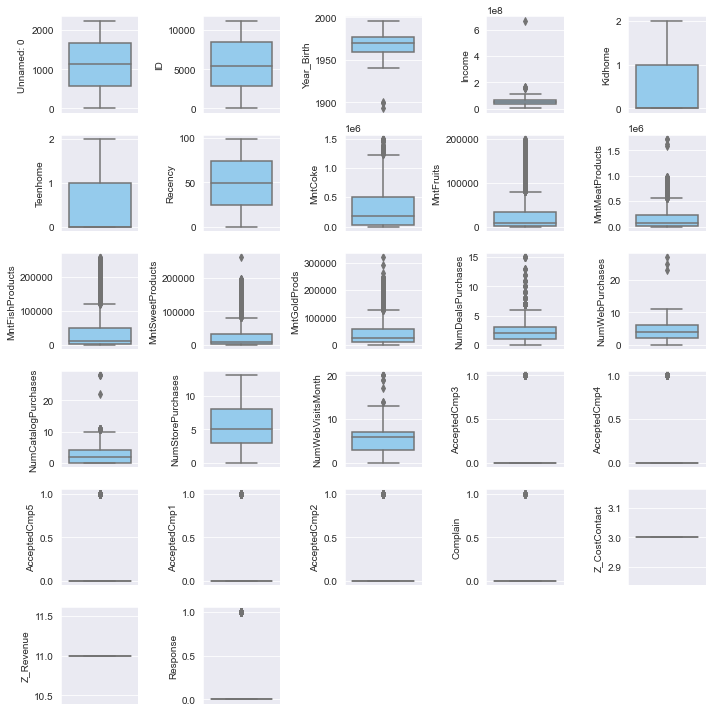

In [52]:
feat_num = numericals
plt.figure(figsize=(10,10))
for i in range(0,len(feat_num)):
    plt.subplot(6,5,i+1)
    sns.boxplot(y=df[feat_num[i]], color = 'lightskyblue', orient = 'v')
    plt.tight_layout()

### - IQR

In [53]:
print(f'Jumlah baris sebelum memfilter outlier: {len(df)}')

filtered_entries = np.array([True] * len(df))
for i in numericals :
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    filtered_entries = ((df[i] >= low_limit) & (df[i] <= high_limit)) & filtered_entries

df_iqr = df[filtered_entries]    
    
print(f'Jumlah baris setelah memfilter outlier: {len(df_iqr)}')


Jumlah baris sebelum memfilter outlier: 2216
Jumlah baris setelah memfilter outlier: 1182


### Z-Scores

In [54]:
print(f'Jumlah baris sebelum memfilter outlier: {len(df)}')

filtered_entries = np.array([True] * len(df))
for i in numericals:
    z_scores = np.abs(stats.zscore(df[i]))
    filtered_entries = (z_scores < 2)
    
df_z = df[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {len(df_z)}')

Jumlah baris sebelum memfilter outlier: 2216
Jumlah baris setelah memfilter outlier: 1883


In [55]:
df_z[df_z['Response'] == 1]

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response


In [56]:
df_z['Response'].unique()

array([0], dtype=int64)

In [57]:
df.shape

(2216, 30)

#### 

## 2.2 Data Transformation

### a. Feature Scaling

#### - Min / Max Normalization

#### - Standarization

#### - Log Transformation

### b. Feature Encoding / Feature Engineering 

#### - Label Encoding (mengubah data kategorikal menjadi numerik dan memiliki tingkatan / ordinal)

#### - One Hot Encoding (membuat kolom baru dan mengisinya dengan nilai biner yaitu 0 dan 1)

### c. Feature Extraction

In [58]:
for i in feat_cat:
    print(i)
    print(df[i].value_counts())
    print(' ')

Education
S1     1116
S3      481
S2      365
D3      200
SMA      54
Name: Education, dtype: int64
 
Marital_Status
Menikah        857
Bertunangan    573
Lajang         475
Cerai          232
Janda           76
Duda             3
Name: Marital_Status, dtype: int64
 
Dt_Customer
31-08-2012    12
12-09-2012    11
14-02-2013    11
12-05-2014    11
20-08-2013    10
              ..
05-08-2012     1
18-11-2012     1
09-05-2014     1
26-06-2013     1
09-01-2014     1
Name: Dt_Customer, Length: 662, dtype: int64
 


In [59]:
df.shape

(2216, 30)

In [60]:
for i in feat_num:
    print(i)
    print(df[i].value_counts())
    print(' ')

Unnamed: 0
0       1
1496    1
1490    1
1491    1
1492    1
       ..
746     1
745     1
744     1
743     1
2239    1
Name: Unnamed: 0, Length: 2216, dtype: int64
 
ID
5524    1
6885    1
3478    1
7494    1
1763    1
       ..
7235    1
3560    1
5278    1
7761    1
9405    1
Name: ID, Length: 2216, dtype: int64
 
Year_Birth
1976    89
1971    86
1975    83
1972    78
1978    76
1970    75
1965    74
1973    72
1969    70
1974    69
1956    55
1979    53
1958    52
1977    52
1952    52
1968    51
1966    50
1959    50
1954    49
1960    49
1955    48
1982    44
1963    44
1962    44
1967    44
1951    42
1983    41
1986    41
1957    41
1964    41
1980    39
1981    38
1984    38
1961    35
1953    35
1985    32
1949    30
1989    29
1988    29
1950    29
1987    27
1948    21
1990    18
1946    16
1947    16
1991    15
1992    13
1945     8
1944     7
1943     6
1995     5
1993     5
1994     3
1996     2
1899     1
1941     1
1893     1
1900     1
1940     1
Name: Year_Birth, dt

In [61]:
df['ConversionRate'] = (df['NumWebPurchases'] / df['NumWebVisitsMonth'])*100

In [62]:
df.columns

Index(['Unnamed: 0', 'ID', 'Year_Birth', 'Education', 'Marital_Status',
       'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntCoke',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'ConversionRate'],
      dtype='object')

In [63]:
df[['NumDealsPurchases','NumWebPurchases','NumCatalogPurchases',
    'NumStorePurchases','NumWebVisitsMonth','ConversionRate']]

,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,ConversionRate
0,3,8,10,4,7,114.285714
1,2,1,1,2,5,20.000000
2,1,8,2,10,4,200.000000
3,2,2,0,4,6,33.333333
4,5,5,3,6,5,100.000000
...,...,...,...,...,...,...
2235,2,9,3,4,5,180.000000
2236,7,8,2,5,7,114.285714
2237,1,2,3,13,6,33.333333
2238,2,6,5,10,3,200.000000


In [64]:
# x = 3.14159265
# formatted_x = format(x, ".2f")
# print(formatted_x)  # output: 3.14

# def 

In [65]:
df['ConversionRate'] = df['ConversionRate'].astype('float64')

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           2216 non-null   int64  
 1   ID                   2216 non-null   int64  
 2   Year_Birth           2216 non-null   int64  
 3   Education            2216 non-null   object 
 4   Marital_Status       2216 non-null   object 
 5   Income               2216 non-null   float64
 6   Kidhome              2216 non-null   int64  
 7   Teenhome             2216 non-null   int64  
 8   Dt_Customer          2216 non-null   object 
 9   Recency              2216 non-null   int64  
 10  MntCoke              2216 non-null   int64  
 11  MntFruits            2216 non-null   int64  
 12  MntMeatProducts      2216 non-null   int64  
 13  MntFishProducts      2216 non-null   int64  
 14  MntSweetProducts     2216 non-null   int64  
 15  MntGoldProds         2216 non-null   i

In [67]:
# for i in range(len(df['ConversionRate'])):
#    df[i] = df[i].round(2)

# print(df['ConversionRate'])    

In [68]:
df['ConversionRate'] = df['ConversionRate'].round(2)
df['ConversionRate']

0       114.29
1        20.00
2       200.00
3        33.33
4       100.00
         ...  
2235    180.00
2236    114.29
2237     33.33
2238    200.00
2239     42.86
Name: ConversionRate, Length: 2216, dtype: float64

In [69]:
# df['ConversionRate'].dtypes()

In [70]:
df.sample()

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,ConversionRate
944,944,8700,1986,SMA,Lajang,14906000.0,0,0,22-12-2012,86,...,0,0,0,0,0,0,3,11,0,28.57


In [71]:
df['Age'] = 2023 - df['Year_Birth']
df['Age']

0       66
1       69
2       58
3       39
4       42
        ..
2235    56
2236    77
2237    42
2238    67
2239    69
Name: Age, Length: 2216, dtype: int64

In [72]:
tes = df['Age'].value_counts()

In [73]:
df[df['Age'] == 130]

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,ConversionRate,Age
239,239,11004,1893,D3,Lajang,60182000.0,0,1,17-05-2014,23,...,0,0,0,0,0,3,11,0,25.0,130


In [74]:
urut = tes.to_list()

In [75]:
urut.sort()

In [76]:
tes = df['Age']

In [77]:
tes2 = sorted(tes)

In [78]:
tes.max()

130

In [79]:
#Membuat kategori umur bisa dengan for, lambda, np where

df['Category'] = np.where(df['Age'] <= 35 ,'Dewasa Awal',
                         np.where(df['Age'] <= 45,'Dewasa Akhir',
                         np.where(df['Age'] <= 55,'Lansia Awal',
                         np.where(df['Age'] <= 65,'Lansia Akhir', 'Manula'
                         ))))

In [80]:
np.unique(tes2)

array([ 27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  82,  83, 123, 124, 130])

In [81]:
df

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,ConversionRate,Age,Category
0,0,5524,1957,S1,Lajang,58138000.0,0,0,04-09-2012,58,...,0,0,0,0,3,11,1,114.29,66,Manula
1,1,2174,1954,S1,Lajang,46344000.0,1,1,08-03-2014,38,...,0,0,0,0,3,11,0,20.00,69,Manula
2,2,4141,1965,S1,Bertunangan,71613000.0,0,0,21-08-2013,26,...,0,0,0,0,3,11,0,200.00,58,Lansia Akhir
3,3,6182,1984,S1,Bertunangan,26646000.0,1,0,10-02-2014,26,...,0,0,0,0,3,11,0,33.33,39,Dewasa Akhir
4,4,5324,1981,S3,Menikah,58293000.0,1,0,19-01-2014,94,...,0,0,0,0,3,11,0,100.00,42,Dewasa Akhir
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,2235,10870,1967,S1,Menikah,61223000.0,0,1,13-06-2013,46,...,0,0,0,0,3,11,0,180.00,56,Lansia Akhir
2236,2236,4001,1946,S3,Bertunangan,64014000.0,2,1,10-06-2014,56,...,0,1,0,0,3,11,0,114.29,77,Manula
2237,2237,7270,1981,S1,Cerai,56981000.0,0,0,25-01-2014,91,...,0,0,0,0,3,11,0,33.33,42,Dewasa Akhir
2238,2238,8235,1956,S2,Bertunangan,69245000.0,0,1,24-01-2014,8,...,0,0,0,0,3,11,0,200.00,67,Manula


In [82]:
df['Children'] = df['Kidhome'] + df['Teenhome']

In [83]:
df['Spending'] = df['MntCoke'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

In [84]:
df.iloc[0]

Unnamed: 0                      0
ID                           5524
Year_Birth                   1957
Education                      S1
Marital_Status             Lajang
Income                 58138000.0
Kidhome                         0
Teenhome                        0
Dt_Customer            04-09-2012
Recency                        58
MntCoke                    635000
MntFruits                   88000
MntMeatProducts            546000
MntFishProducts            172000
MntSweetProducts            88000
MntGoldProds                88000
NumDealsPurchases               3
NumWebPurchases                 8
NumCatalogPurchases            10
NumStorePurchases               4
NumWebVisitsMonth               7
AcceptedCmp3                    0
AcceptedCmp4                    0
AcceptedCmp5                    0
AcceptedCmp1                    0
AcceptedCmp2                    0
Complain                        0
Z_CostContact                   3
Z_Revenue                      11
Response      

## 2.3 Data Reduction 

### a. Feature Selection

- membuang fitur - fitur yang tidak relevan 
- membuang fitur - fitur yang redundant 
- mengurangi fitur

<AxesSubplot:>

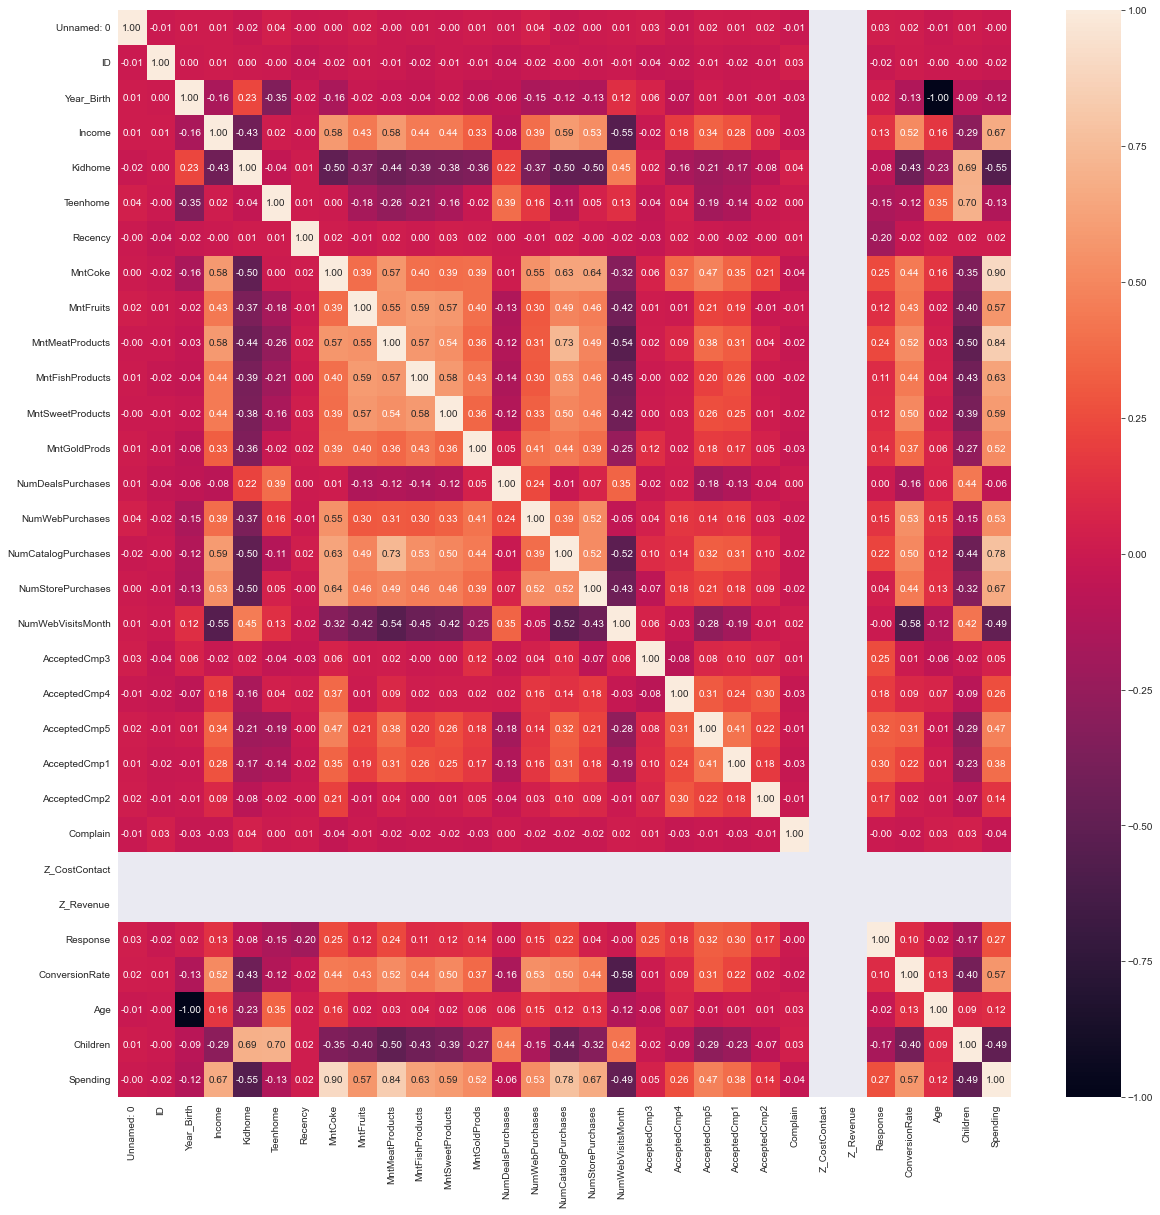

In [85]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True, fmt='.2f')

In [86]:
df['Z_CostContact'].value_counts()

3    2216
Name: Z_CostContact, dtype: int64

In [87]:
df['Z_Revenue'].value_counts()

11    2216
Name: Z_Revenue, dtype: int64

In [88]:
#menghapus 2 kolom tidak relevan
df = df.drop(['Z_CostContact','Z_Revenue'],axis=1)

<AxesSubplot:>

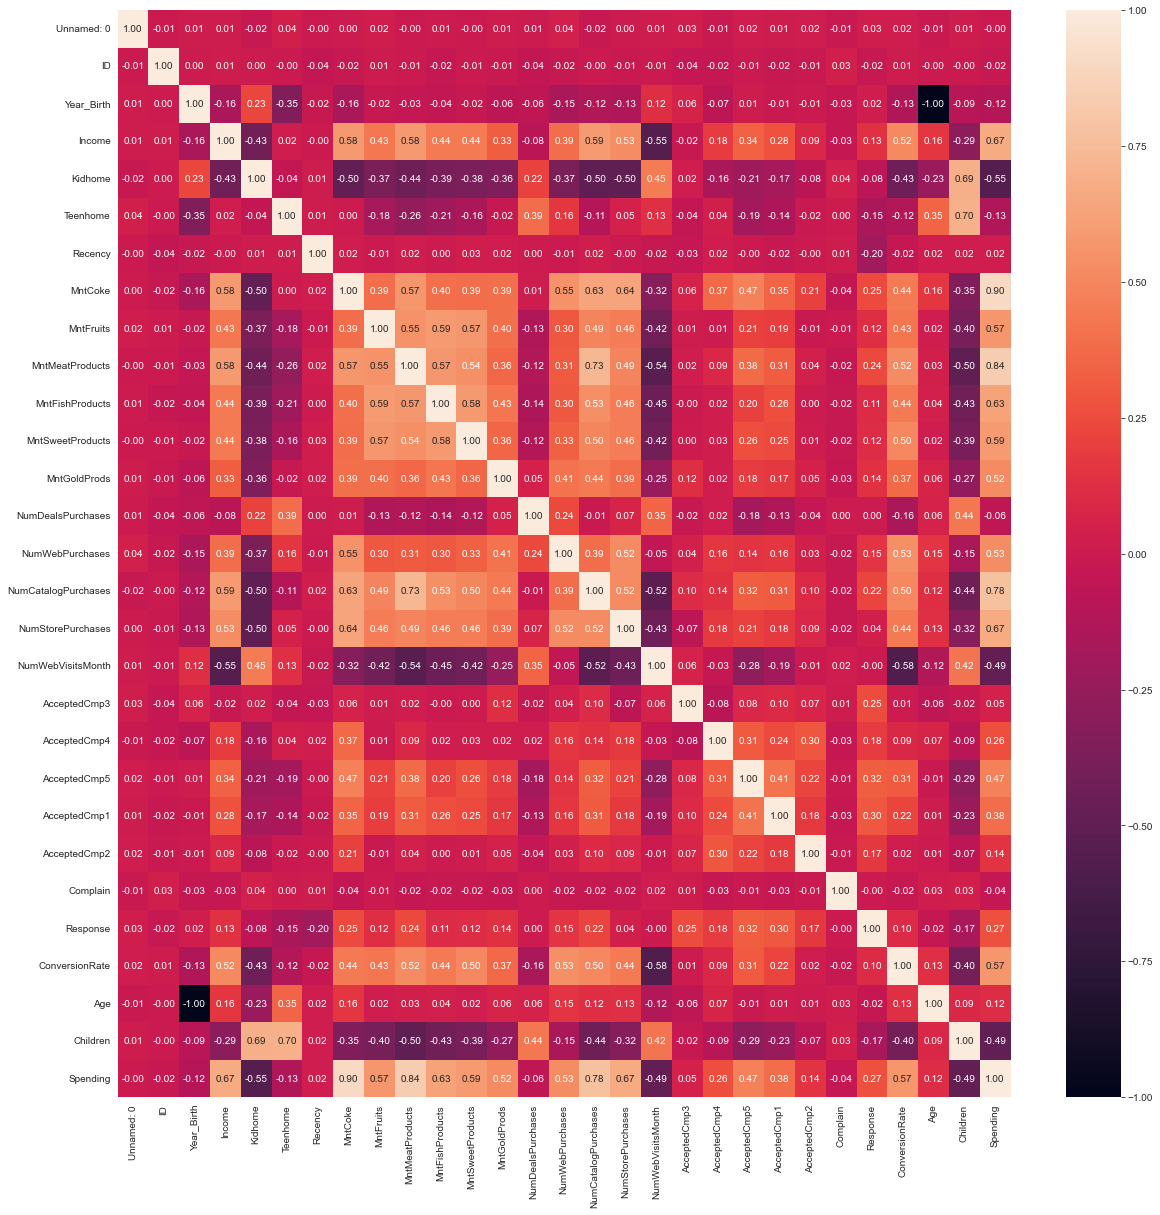

In [89]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True, fmt='.2f')

### b. Dimensionality Reduction

## 2.4 Data Imputation

## 2.5 Data Balancing (Class Imbalance)

## 2.6 Data Augmentation

## 2.7 Splitting Data

## 2.8 Correlation Analysis

## 2.9 Statistical Analysis

## 2.10 Hypothesis Testing

In [90]:
df

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,ConversionRate,Age,Category,Children,Spending
0,0,5524,1957,S1,Lajang,58138000.0,0,0,04-09-2012,58,...,0,0,0,0,1,114.29,66,Manula,0,1529000
1,1,2174,1954,S1,Lajang,46344000.0,1,1,08-03-2014,38,...,0,0,0,0,0,20.00,69,Manula,2,26000
2,2,4141,1965,S1,Bertunangan,71613000.0,0,0,21-08-2013,26,...,0,0,0,0,0,200.00,58,Lansia Akhir,0,727000
3,3,6182,1984,S1,Bertunangan,26646000.0,1,0,10-02-2014,26,...,0,0,0,0,0,33.33,39,Dewasa Akhir,1,49000
4,4,5324,1981,S3,Menikah,58293000.0,1,0,19-01-2014,94,...,0,0,0,0,0,100.00,42,Dewasa Akhir,1,379000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,2235,10870,1967,S1,Menikah,61223000.0,0,1,13-06-2013,46,...,0,0,0,0,0,180.00,56,Lansia Akhir,1,1298000
2236,2236,4001,1946,S3,Bertunangan,64014000.0,2,1,10-06-2014,56,...,0,1,0,0,0,114.29,77,Manula,3,444000
2237,2237,7270,1981,S1,Cerai,56981000.0,0,0,25-01-2014,91,...,0,0,0,0,0,33.33,42,Dewasa Akhir,0,1193000
2238,2238,8235,1956,S2,Bertunangan,69245000.0,0,1,24-01-2014,8,...,0,0,0,0,0,200.00,67,Manula,1,813000


# TASK 1

In [91]:
df

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,ConversionRate,Age,Category,Children,Spending
0,0,5524,1957,S1,Lajang,58138000.0,0,0,04-09-2012,58,...,0,0,0,0,1,114.29,66,Manula,0,1529000
1,1,2174,1954,S1,Lajang,46344000.0,1,1,08-03-2014,38,...,0,0,0,0,0,20.00,69,Manula,2,26000
2,2,4141,1965,S1,Bertunangan,71613000.0,0,0,21-08-2013,26,...,0,0,0,0,0,200.00,58,Lansia Akhir,0,727000
3,3,6182,1984,S1,Bertunangan,26646000.0,1,0,10-02-2014,26,...,0,0,0,0,0,33.33,39,Dewasa Akhir,1,49000
4,4,5324,1981,S3,Menikah,58293000.0,1,0,19-01-2014,94,...,0,0,0,0,0,100.00,42,Dewasa Akhir,1,379000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,2235,10870,1967,S1,Menikah,61223000.0,0,1,13-06-2013,46,...,0,0,0,0,0,180.00,56,Lansia Akhir,1,1298000
2236,2236,4001,1946,S3,Bertunangan,64014000.0,2,1,10-06-2014,56,...,0,1,0,0,0,114.29,77,Manula,3,444000
2237,2237,7270,1981,S1,Cerai,56981000.0,0,0,25-01-2014,91,...,0,0,0,0,0,33.33,42,Dewasa Akhir,0,1193000
2238,2238,8235,1956,S2,Bertunangan,69245000.0,0,1,24-01-2014,8,...,0,0,0,0,0,200.00,67,Manula,1,813000


In [92]:
df[df['ID'] == 5524]

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,ConversionRate,Age,Category,Children,Spending
0,0,5524,1957,S1,Lajang,58138000.0,0,0,04-09-2012,58,...,0,0,0,0,1,114.29,66,Manula,0,1529000


In [93]:
df[df['Response'] == 1]

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,ConversionRate,Age,Category,Children,Spending
0,0,5524,1957,S1,Lajang,58138000.0,0,0,04-09-2012,58,...,0,0,0,0,1,114.29,66,Manula,0,1529000
8,8,4855,1974,S3,Bertunangan,30351000.0,1,0,06-06-2013,19,...,0,0,0,0,1,33.33,49,Lansia Awal,1,46000
15,15,2114,1946,S3,Lajang,82800000.0,0,0,24-11-2012,23,...,1,1,0,0,1,233.33,77,Manula,0,1293000
33,33,7373,1952,S3,Cerai,46610000.0,0,2,29-10-2012,8,...,0,0,0,0,1,66.67,71,Manula,2,290000
39,39,2968,1943,S3,Cerai,48948000.0,0,0,01-02-2013,53,...,0,0,0,0,1,116.67,80,Manula,0,894000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2194,2194,7118,1957,S1,Menikah,73803000.0,0,1,01-08-2012,61,...,0,0,0,0,1,150.00,66,Manula,1,1448000
2198,2198,2632,1954,S1,Menikah,50501000.0,1,1,18-06-2013,10,...,0,0,0,0,1,83.33,69,Manula,2,500000
2202,2202,11133,1973,S3,Lajang,48432000.0,0,1,18-10-2012,3,...,0,0,0,0,1,87.50,50,Lansia Awal,1,421000
2221,2221,7366,1982,S2,Lajang,75777000.0,0,0,04-07-2013,12,...,1,0,0,0,1,300.00,41,Dewasa Akhir,0,1412000


In [94]:
df.loc[0]

Unnamed: 0                      0
ID                           5524
Year_Birth                   1957
Education                      S1
Marital_Status             Lajang
Income                 58138000.0
Kidhome                         0
Teenhome                        0
Dt_Customer            04-09-2012
Recency                        58
MntCoke                    635000
MntFruits                   88000
MntMeatProducts            546000
MntFishProducts            172000
MntSweetProducts            88000
MntGoldProds                88000
NumDealsPurchases               3
NumWebPurchases                 8
NumCatalogPurchases            10
NumStorePurchases               4
NumWebVisitsMonth               7
AcceptedCmp3                    0
AcceptedCmp4                    0
AcceptedCmp5                    0
AcceptedCmp1                    0
AcceptedCmp2                    0
Complain                        0
Response                        1
ConversionRate             114.29
Age           

In [95]:
df['Accepted'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] 
+ df['AcceptedCmp5']

0       0
1       0
2       0
3       0
4       0
       ..
2235    0
2236    0
2237    0
2238    0
2239    0
Name: AcceptedCmp5, Length: 2216, dtype: int64

In [96]:
df[df['Accepted'] == 1 ]

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,ConversionRate,Age,Category,Children,Spending,Accepted
9,9,5899,1950,S3,Bertunangan,5648000.0,1,1,13-03-2014,68,...,0,0,0,0,5.00,73,Manula,2,49000,1
15,15,2114,1946,S3,Lajang,82800000.0,0,0,24-11-2012,23,...,1,0,0,1,233.33,77,Manula,0,1293000,1
18,18,6565,1949,S2,Menikah,76995000.0,0,1,28-03-2013,91,...,1,0,0,0,220.00,74,Manula,1,1702000,1
22,22,1993,1949,S3,Menikah,58607000.0,0,1,23-12-2012,63,...,0,0,0,0,25.00,74,Manula,1,972000,1
32,32,5710,1970,S1,Bertunangan,40548000.0,0,1,10-10-2012,31,...,0,0,0,0,40.00,53,Lansia Awal,1,120000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2221,2221,7366,1982,S2,Lajang,75777000.0,0,0,04-07-2013,12,...,0,0,0,1,300.00,41,Dewasa Akhir,0,1412000,1
2224,2224,4286,1970,S3,Lajang,57642000.0,0,1,09-01-2014,24,...,0,0,0,0,175.00,53,Lansia Awal,1,673000,1
2230,2230,7004,1984,S1,Lajang,11012000.0,1,0,16-03-2013,82,...,0,0,0,0,33.33,39,Dewasa Akhir,1,81000,1
2236,2236,4001,1946,S3,Bertunangan,64014000.0,2,1,10-06-2014,56,...,1,0,0,0,114.29,77,Manula,3,444000,1


In [97]:
df[(df['Accepted'] == 1 ) & (df['Response'] == 1)]

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,ConversionRate,Age,Category,Children,Spending,Accepted
15,15,2114,1946,S3,Lajang,82800000.0,0,0,24-11-2012,23,...,1,0,0,1,233.33,77,Manula,0,1293000,1
39,39,2968,1943,S3,Cerai,48948000.0,0,0,01-02-2013,53,...,0,0,0,1,116.67,80,Manula,0,894000,1
60,60,6853,1982,S2,Lajang,75777000.0,0,0,04-07-2013,12,...,0,0,0,1,300.00,41,Dewasa Akhir,0,1412000,1
77,77,7503,1976,S1,Lajang,75825000.0,0,0,12-10-2012,40,...,0,0,0,1,125.00,47,Lansia Awal,0,2104000,1
79,79,1618,1965,S1,Bertunangan,56046000.0,0,0,02-01-2013,9,...,0,0,0,1,125.00,58,Lansia Akhir,0,692000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2131,2131,3919,1976,S2,Lajang,72309000.0,0,0,11-03-2013,64,...,1,0,0,1,166.67,47,Lansia Awal,0,1931000,1
2175,2175,1772,1975,S3,Menikah,79174000.0,0,0,11-01-2013,2,...,1,0,0,1,250.00,48,Lansia Awal,0,2006000,1
2194,2194,7118,1957,S1,Menikah,73803000.0,0,1,01-08-2012,61,...,0,0,0,1,150.00,66,Manula,1,1448000,1
2198,2198,2632,1954,S1,Menikah,50501000.0,1,1,18-06-2013,10,...,0,0,0,1,83.33,69,Manula,2,500000,1


In [98]:
df_task = df[df['Response'] == 1 ]
df_task

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,ConversionRate,Age,Category,Children,Spending,Accepted
0,0,5524,1957,S1,Lajang,58138000.0,0,0,04-09-2012,58,...,0,0,0,1,114.29,66,Manula,0,1529000,0
8,8,4855,1974,S3,Bertunangan,30351000.0,1,0,06-06-2013,19,...,0,0,0,1,33.33,49,Lansia Awal,1,46000,0
15,15,2114,1946,S3,Lajang,82800000.0,0,0,24-11-2012,23,...,1,0,0,1,233.33,77,Manula,0,1293000,1
33,33,7373,1952,S3,Cerai,46610000.0,0,2,29-10-2012,8,...,0,0,0,1,66.67,71,Manula,2,290000,0
39,39,2968,1943,S3,Cerai,48948000.0,0,0,01-02-2013,53,...,0,0,0,1,116.67,80,Manula,0,894000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2194,2194,7118,1957,S1,Menikah,73803000.0,0,1,01-08-2012,61,...,0,0,0,1,150.00,66,Manula,1,1448000,1
2198,2198,2632,1954,S1,Menikah,50501000.0,1,1,18-06-2013,10,...,0,0,0,1,83.33,69,Manula,2,500000,1
2202,2202,11133,1973,S3,Lajang,48432000.0,0,1,18-10-2012,3,...,0,0,0,1,87.50,50,Lansia Awal,1,421000,0
2221,2221,7366,1982,S2,Lajang,75777000.0,0,0,04-07-2013,12,...,0,0,0,1,300.00,41,Dewasa Akhir,0,1412000,1


In [99]:
tess = df_task.groupby(['Category','ConversionRate']).agg({'ID':'count'})
tess = tess.reset_index()

In [100]:
# plt.figure(figsize=(10,5))
# # bar_colors = ['tab:red', 'tab:orange', 'tab:green', 'tab:blue','tab:brown']
# # plt.bar(x='Category',height='ConversionRate',data=tess,color=bar_colors)  #menggunakan matplotlib

# # bar_colors = ['tab:red', 'tab:orange', 'tab:green', 'tab:blue','tab:brown']
# plt.bar(x='Category',height='ConversionRate',data=tess,color='teal')  #menggunakan matplotlib

# plt.title('Persentase total conversion rate berdasarkan jenis user \n yang berpotensi untuk merespon campaign', fontsize = 16,
#          y = 1.09,fontweight='bold')
# plt.xlabel('User Category', fontsize = 14,labelpad =20,fontweight='semibold')
# plt.ylabel('Conversion Rate (%)', fontsize = 14,labelpad =20,fontweight='semibold')
# plt.tick_params(axis='both', which='major', labelsize=14)
# plt.ylim(0,4000)
# plt.tight_layout()


# x = tess['Category']
# y = tess['ConversionRate']

# anotasi = range(len(x))
# for i in anotasi:
#     plt.text(x = anotasi[i]-0.15, y = y[i]+100, s = round(y[i],2), fontsize=14, fontweight='semibold')

# plt.show()

In [101]:
df['NumWebVisitsMonth'].unique()

array([ 7,  5,  4,  6,  8,  9, 20,  2,  3,  1, 10,  0, 14, 19, 17, 13],
      dtype=int64)

In [102]:
df.columns

Index(['Unnamed: 0', 'ID', 'Year_Birth', 'Education', 'Marital_Status',
       'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntCoke',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'ConversionRate', 'Age',
       'Category', 'Children', 'Spending', 'Accepted'],
      dtype='object')

In [103]:
df['Accepted'].unique()

array([0, 1, 2, 3], dtype=int64)

In [104]:
df['NumWebVisitsMonth'].unique()

array([ 7,  5,  4,  6,  8,  9, 20,  2,  3,  1, 10,  0, 14, 19, 17, 13],
      dtype=int64)

In [105]:
df['Transaction'] = df['NumDealsPurchases'] + df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']

In [106]:
df['Transaction'].unique()

array([25,  6, 21,  8, 19, 22, 10,  2, 16, 15,  5, 26,  9, 13, 12, 43, 17,
       20, 14, 11, 18, 28,  7, 24,  4, 29, 23, 27, 32, 30, 37, 31, 33, 35,
       39,  1, 34,  0, 44], dtype=int64)

In [107]:
df[['NumDealsPurchases','Transaction','NumWebPurchases','NumWebVisitsMonth','ConversionRate']]

,NumDealsPurchases,Transaction,NumWebPurchases,NumWebVisitsMonth,ConversionRate
0,3,25,8,7,114.29
1,2,6,1,5,20.00
2,1,21,8,4,200.00
3,2,8,2,6,33.33
4,5,19,5,5,100.00
...,...,...,...,...,...
2235,2,18,9,5,180.00
2236,7,22,8,7,114.29
2237,1,19,2,6,33.33
2238,2,23,6,3,200.00


In [108]:
tess

,Category,ConversionRate,ID
0,Dewasa Akhir,0.00,1
1,Dewasa Akhir,11.11,2
2,Dewasa Akhir,12.50,4
3,Dewasa Akhir,14.29,2
4,Dewasa Akhir,16.67,1
...,...,...,...
145,Manula,250.00,5
146,Manula,275.00,1
147,Manula,300.00,4
148,Manula,400.00,2


In [109]:
tess.rename(columns = {'ID' : 'Jumlah'})

,Category,ConversionRate,Jumlah
0,Dewasa Akhir,0.00,1
1,Dewasa Akhir,11.11,2
2,Dewasa Akhir,12.50,4
3,Dewasa Akhir,14.29,2
4,Dewasa Akhir,16.67,1
...,...,...,...
145,Manula,250.00,5
146,Manula,275.00,1
147,Manula,300.00,4
148,Manula,400.00,2


In [110]:
tess['Category'].unique()

array(['Dewasa Akhir', 'Dewasa Awal', 'Lansia Akhir', 'Lansia Awal',
       'Manula'], dtype=object)

In [111]:
tess['ConversionRate'].unique()

array([  0.  ,  11.11,  12.5 ,  14.29,  16.67,  22.22,  25.  ,  28.57,
        33.33,  37.5 ,  40.  ,  44.44,  50.  ,  57.14,  66.67,  75.  ,
        77.78,  83.33, 100.  , 116.67, 133.33, 150.  , 160.  , 166.67,
       175.  , 200.  , 220.  , 233.33, 250.  , 300.  , 333.33, 350.  ,
       400.  ,  42.86,  62.5 ,  71.43,  87.5 , 112.5 , 125.  , 128.57,
       140.  , 157.14, 180.  , 183.33,  20.  ,  55.56,  85.71, 114.29,
       120.  , 266.67, 275.  , 122.22, 137.5 , 225.  , 500.  ])

In [112]:
dewak = tess[tess['Category'] == 'Dewasa Akhir']

In [113]:
dewaw = tess[tess['Category'] == 'Dewasa Awal']

In [114]:
manu = tess[tess['Category'] == 'Manula']

In [115]:
lanaw = tess[tess['Category'] == 'Lansia Awal']

In [116]:
lanak = tess[tess['Category'] == 'Lansia Akhir']

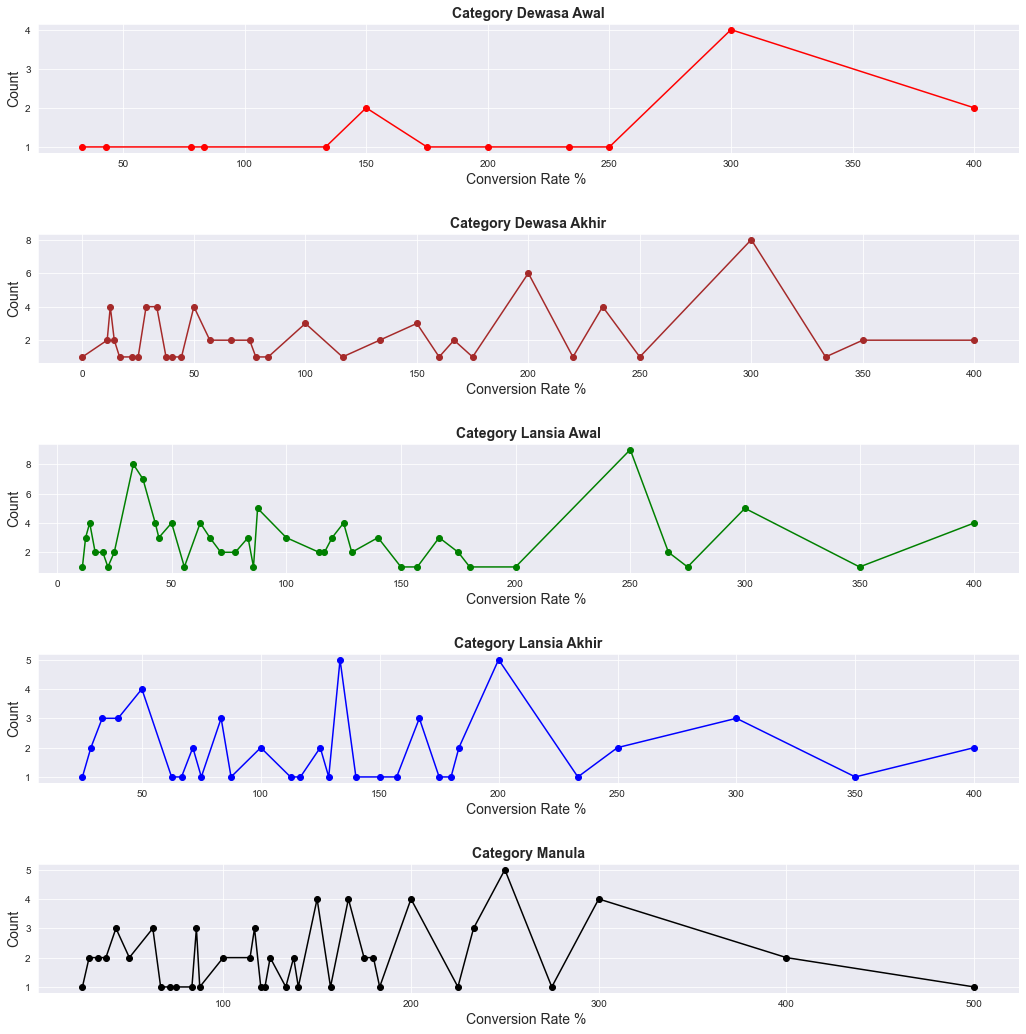

In [117]:
fig, ax = plt.subplots(5,1,figsize=(15,15))

ax[0].plot(dewaw['ConversionRate'],dewaw['ID'],color='red',marker='o',markerfacecolor='red')
ax[0].set_title('Category Dewasa Awal',fontsize=14,fontweight='bold')
# ax[0].set_xlim(1980,2010)
ax[0].set_xlabel('Conversion Rate % ',fontsize=14)
ax[0].set_ylabel('Count',fontsize=14)
# ax[0].set_xticks(range(1970,2014,4)) #atur kelipatan yang ditampilkan

ax[1].plot(dewak['ConversionRate'],dewak['ID'],color='brown',marker='o',markerfacecolor='brown')
ax[1].set_title('Category Dewasa Akhir',fontsize=14,fontweight='bold')
ax[1].set_xlabel('Conversion Rate % ',fontsize=14)
ax[1].set_ylabel('Count',fontsize=14)

ax[2].plot(lanaw['ConversionRate'],lanaw['ID'],color='green',marker='o',markerfacecolor='green')
ax[2].set_title('Category Lansia Awal',fontsize=14,fontweight='bold')
ax[2].set_xlabel('Conversion Rate % ',fontsize=14)
ax[2].set_ylabel('Count',fontsize=14)

ax[3].plot(lanak['ConversionRate'],lanak['ID'],color='blue',marker='o',markerfacecolor='blue')
ax[3].set_title('Category Lansia Akhir',fontsize=14,fontweight='bold')
ax[3].set_xlabel('Conversion Rate % ',fontsize=14)
ax[3].set_ylabel('Count',fontsize=14)

ax[4].plot(manu['ConversionRate'],manu['ID'],color='black',marker='o',markerfacecolor='black')
ax[4].set_title('Category Manula',fontsize=14,fontweight='bold')
ax[4].set_xlabel('Conversion Rate % ',fontsize=14)
ax[4].set_ylabel('Count',fontsize=14)



fig.tight_layout(pad=3.0)

In [118]:
dewaw

,Category,ConversionRate,ID
33,Dewasa Awal,33.33,1
34,Dewasa Awal,42.86,1
35,Dewasa Awal,77.78,1
36,Dewasa Awal,83.33,1
37,Dewasa Awal,133.33,1
38,Dewasa Awal,150.00,2
39,Dewasa Awal,175.00,1
40,Dewasa Awal,200.00,1
41,Dewasa Awal,233.33,1
42,Dewasa Awal,250.00,1


In [119]:
#umur

df_task.groupby(['ConversionRate']).agg({'Age':'count'})

,Age
ConversionRate,
0.00,1
11.11,3
12.50,7
14.29,6
16.67,3
20.00,2
22.22,2
25.00,5
28.57,8


In [120]:
df_task

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,ConversionRate,Age,Category,Children,Spending,Accepted
0,0,5524,1957,S1,Lajang,58138000.0,0,0,04-09-2012,58,...,0,0,0,1,114.29,66,Manula,0,1529000,0
8,8,4855,1974,S3,Bertunangan,30351000.0,1,0,06-06-2013,19,...,0,0,0,1,33.33,49,Lansia Awal,1,46000,0
15,15,2114,1946,S3,Lajang,82800000.0,0,0,24-11-2012,23,...,1,0,0,1,233.33,77,Manula,0,1293000,1
33,33,7373,1952,S3,Cerai,46610000.0,0,2,29-10-2012,8,...,0,0,0,1,66.67,71,Manula,2,290000,0
39,39,2968,1943,S3,Cerai,48948000.0,0,0,01-02-2013,53,...,0,0,0,1,116.67,80,Manula,0,894000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2194,2194,7118,1957,S1,Menikah,73803000.0,0,1,01-08-2012,61,...,0,0,0,1,150.00,66,Manula,1,1448000,1
2198,2198,2632,1954,S1,Menikah,50501000.0,1,1,18-06-2013,10,...,0,0,0,1,83.33,69,Manula,2,500000,1
2202,2202,11133,1973,S3,Lajang,48432000.0,0,1,18-10-2012,3,...,0,0,0,1,87.50,50,Lansia Awal,1,421000,0
2221,2221,7366,1982,S2,Lajang,75777000.0,0,0,04-07-2013,12,...,0,0,0,1,300.00,41,Dewasa Akhir,0,1412000,1


In [121]:
tis = tess.groupby(['Category']).agg({'ConversionRate':'mean'}).reset_index()

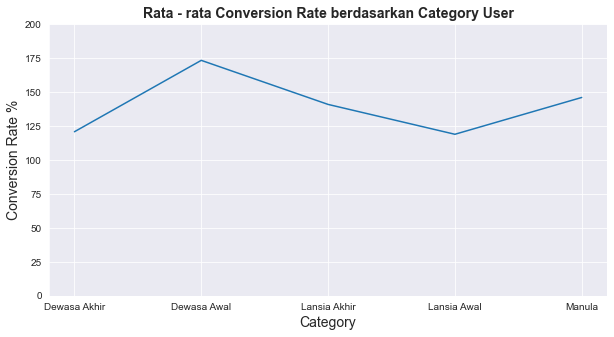

In [122]:
plt.figure(figsize=(10,5))
plt.plot(tis['Category'],tis['ConversionRate'])
plt.title('Rata - rata Conversion Rate berdasarkan Category User',fontweight='bold',fontsize=14)
plt.ylabel('Conversion Rate %',fontsize=14)
plt.xlabel('Category',fontsize=14)
plt.ylim(0,200)
plt.show()

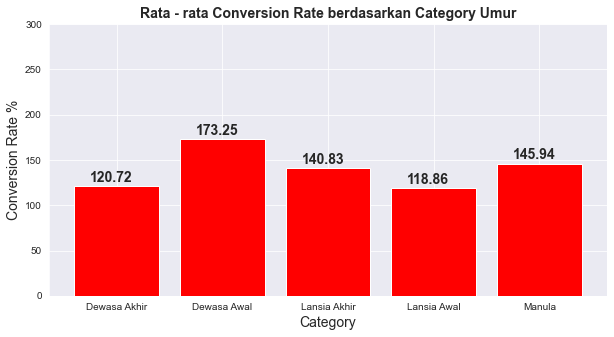

In [123]:
plt.figure(figsize=(10,5))
plt.bar(x='Category',height='ConversionRate',data=tis,color='r')
plt.title('Rata - rata Conversion Rate berdasarkan Category Umur',fontweight='bold',fontsize=14)
plt.ylabel('Conversion Rate %',fontsize=14)
plt.xlabel('Category',fontsize=14)
plt.ylim(0,300)

x = tis['Category']
y = tis['ConversionRate']

anotasi = range(len(x))
for i in anotasi:
    plt.text(x = anotasi[i]-0.25, y = y[i]+5, s = round(y[i],2), fontsize=14, fontweight='semibold')

plt.show()

In [124]:
df_task.columns

Index(['Unnamed: 0', 'ID', 'Year_Birth', 'Education', 'Marital_Status',
       'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntCoke',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'ConversionRate', 'Age',
       'Category', 'Children', 'Spending', 'Accepted'],
      dtype='object')

In [125]:
df_task[['Kidhome','Teenhome','Children']]

,Kidhome,Teenhome,Children
0,0,0,0
8,1,0,1
15,0,0,0
33,0,2,2
39,0,0,0
...,...,...,...
2194,0,1,1
2198,1,1,2
2202,0,1,1
2221,0,0,0


In [126]:
child = df_task.groupby(['Children']).agg({'ConversionRate':'mean'}).reset_index()

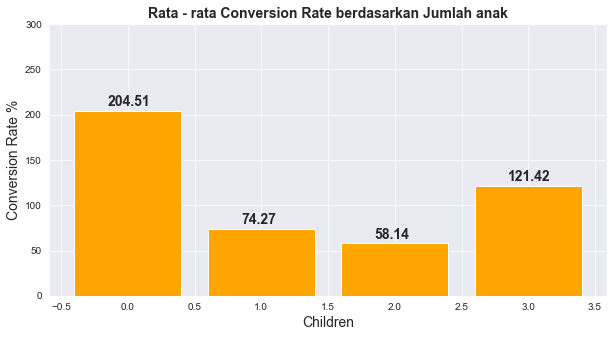

In [127]:
plt.figure(figsize=(10,5))
plt.bar(x='Children',height='ConversionRate',data=child,color='orange')
plt.title('Rata - rata Conversion Rate berdasarkan Jumlah anak',fontweight='bold',fontsize=14)
plt.ylabel('Conversion Rate %',fontsize=14)
plt.xlabel('Children',fontsize=14)
plt.ylim(0,300)

x = child['Children']
y = child['ConversionRate']

anotasi = range(len(x))
for i in anotasi:
    plt.text(x = anotasi[i]-0.15, y = y[i]+5, s = round(y[i],2), fontsize=14, fontweight='semibold')

plt.show()

plt.show()

In [128]:
df_task.iloc[0]

Unnamed: 0                      0
ID                           5524
Year_Birth                   1957
Education                      S1
Marital_Status             Lajang
Income                 58138000.0
Kidhome                         0
Teenhome                        0
Dt_Customer            04-09-2012
Recency                        58
MntCoke                    635000
MntFruits                   88000
MntMeatProducts            546000
MntFishProducts            172000
MntSweetProducts            88000
MntGoldProds                88000
NumDealsPurchases               3
NumWebPurchases                 8
NumCatalogPurchases            10
NumStorePurchases               4
NumWebVisitsMonth               7
AcceptedCmp3                    0
AcceptedCmp4                    0
AcceptedCmp5                    0
AcceptedCmp1                    0
AcceptedCmp2                    0
Complain                        0
Response                        1
ConversionRate             114.29
Age           

In [129]:
spending = df_task.groupby('Category').agg({'Spending' : 'mean'}).reset_index().round(2)
spending

,Category,Spending
0,Dewasa Akhir,836808.22
1,Dewasa Awal,1389882.35
2,Lansia Akhir,1089844.83
3,Lansia Awal,805875.00
4,Manula,1060369.86


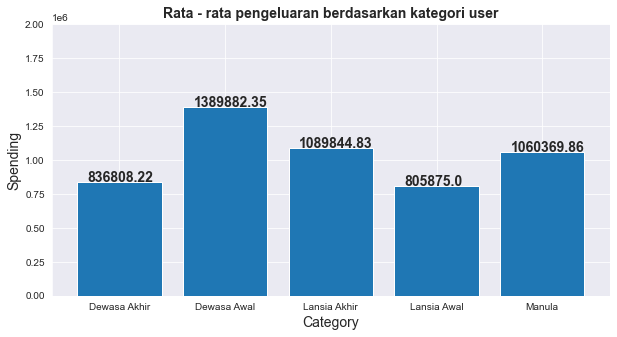

In [130]:
plt.figure(figsize=(10,5))
plt.bar(x='Category',height='Spending',data = spending)
plt.title('Rata - rata pengeluaran berdasarkan kategori user',fontsize=14,fontweight='bold')
plt.ylabel('Spending',fontsize=14)
plt.xlabel('Category',fontsize=14)
plt.ylim(0,2000000)

x = spending['Category']
y = spending['Spending']

anotasi = range(len(x))
for i in anotasi:
    plt.text(x = anotasi[i]-0.3, y = y[i]+5, s = round(y[i],2), fontsize=14, fontweight='semibold')

plt.show()

In [131]:
df.iloc[0]

Unnamed: 0                      0
ID                           5524
Year_Birth                   1957
Education                      S1
Marital_Status             Lajang
Income                 58138000.0
Kidhome                         0
Teenhome                        0
Dt_Customer            04-09-2012
Recency                        58
MntCoke                    635000
MntFruits                   88000
MntMeatProducts            546000
MntFishProducts            172000
MntSweetProducts            88000
MntGoldProds                88000
NumDealsPurchases               3
NumWebPurchases                 8
NumCatalogPurchases            10
NumStorePurchases               4
NumWebVisitsMonth               7
AcceptedCmp3                    0
AcceptedCmp4                    0
AcceptedCmp5                    0
AcceptedCmp1                    0
AcceptedCmp2                    0
Complain                        0
Response                        1
ConversionRate             114.29
Age           

In [132]:
transaksi = df_task.groupby('Category').agg({'NumDealsPurchases' : 'mean'}).round().reset_index()
transaksi

,Category,NumDealsPurchases
0,Dewasa Akhir,2.0
1,Dewasa Awal,1.0
2,Lansia Akhir,3.0
3,Lansia Awal,3.0
4,Manula,3.0


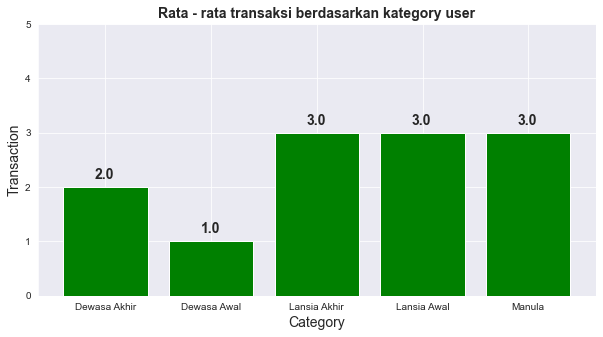

In [133]:
plt.figure(figsize=(10,5))
plt.bar(x='Category',height='NumDealsPurchases',data=transaksi,color='green')
plt.title('Rata - rata transaksi berdasarkan kategory user',fontweight='bold',fontsize=14)
plt.ylabel('Transaction',fontsize=14)
plt.xlabel('Category',fontsize=14)
plt.ylim(0,5)

x = transaksi['Category']
y = transaksi['NumDealsPurchases']

anotasi = range(len(x))
for i in anotasi:
    plt.text(x = anotasi[i]-0.1, y = y[i]+0.15, s = round(y[i],2), fontsize=14, fontweight='semibold')

plt.show()

#### 

# TASK 2

In [134]:
df

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,AcceptedCmp2,Complain,Response,ConversionRate,Age,Category,Children,Spending,Accepted,Transaction
0,0,5524,1957,S1,Lajang,58138000.0,0,0,04-09-2012,58,...,0,0,1,114.29,66,Manula,0,1529000,0,25
1,1,2174,1954,S1,Lajang,46344000.0,1,1,08-03-2014,38,...,0,0,0,20.00,69,Manula,2,26000,0,6
2,2,4141,1965,S1,Bertunangan,71613000.0,0,0,21-08-2013,26,...,0,0,0,200.00,58,Lansia Akhir,0,727000,0,21
3,3,6182,1984,S1,Bertunangan,26646000.0,1,0,10-02-2014,26,...,0,0,0,33.33,39,Dewasa Akhir,1,49000,0,8
4,4,5324,1981,S3,Menikah,58293000.0,1,0,19-01-2014,94,...,0,0,0,100.00,42,Dewasa Akhir,1,379000,0,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,2235,10870,1967,S1,Menikah,61223000.0,0,1,13-06-2013,46,...,0,0,0,180.00,56,Lansia Akhir,1,1298000,0,18
2236,2236,4001,1946,S3,Bertunangan,64014000.0,2,1,10-06-2014,56,...,0,0,0,114.29,77,Manula,3,444000,1,22
2237,2237,7270,1981,S1,Cerai,56981000.0,0,0,25-01-2014,91,...,0,0,0,33.33,42,Dewasa Akhir,0,1193000,1,19
2238,2238,8235,1956,S2,Bertunangan,69245000.0,0,1,24-01-2014,8,...,0,0,0,200.00,67,Manula,1,813000,0,23


#### - Untuk Proses Handle Missing Value dan Duplicated Data sudah dilakukan pada proses sebelumnya

In [135]:
df

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,AcceptedCmp2,Complain,Response,ConversionRate,Age,Category,Children,Spending,Accepted,Transaction
0,0,5524,1957,S1,Lajang,58138000.0,0,0,04-09-2012,58,...,0,0,1,114.29,66,Manula,0,1529000,0,25
1,1,2174,1954,S1,Lajang,46344000.0,1,1,08-03-2014,38,...,0,0,0,20.00,69,Manula,2,26000,0,6
2,2,4141,1965,S1,Bertunangan,71613000.0,0,0,21-08-2013,26,...,0,0,0,200.00,58,Lansia Akhir,0,727000,0,21
3,3,6182,1984,S1,Bertunangan,26646000.0,1,0,10-02-2014,26,...,0,0,0,33.33,39,Dewasa Akhir,1,49000,0,8
4,4,5324,1981,S3,Menikah,58293000.0,1,0,19-01-2014,94,...,0,0,0,100.00,42,Dewasa Akhir,1,379000,0,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,2235,10870,1967,S1,Menikah,61223000.0,0,1,13-06-2013,46,...,0,0,0,180.00,56,Lansia Akhir,1,1298000,0,18
2236,2236,4001,1946,S3,Bertunangan,64014000.0,2,1,10-06-2014,56,...,0,0,0,114.29,77,Manula,3,444000,1,22
2237,2237,7270,1981,S1,Cerai,56981000.0,0,0,25-01-2014,91,...,0,0,0,33.33,42,Dewasa Akhir,0,1193000,1,19
2238,2238,8235,1956,S2,Bertunangan,69245000.0,0,1,24-01-2014,8,...,0,0,0,200.00,67,Manula,1,813000,0,23


## Label Encoding

In [136]:
df

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,AcceptedCmp2,Complain,Response,ConversionRate,Age,Category,Children,Spending,Accepted,Transaction
0,0,5524,1957,S1,Lajang,58138000.0,0,0,04-09-2012,58,...,0,0,1,114.29,66,Manula,0,1529000,0,25
1,1,2174,1954,S1,Lajang,46344000.0,1,1,08-03-2014,38,...,0,0,0,20.00,69,Manula,2,26000,0,6
2,2,4141,1965,S1,Bertunangan,71613000.0,0,0,21-08-2013,26,...,0,0,0,200.00,58,Lansia Akhir,0,727000,0,21
3,3,6182,1984,S1,Bertunangan,26646000.0,1,0,10-02-2014,26,...,0,0,0,33.33,39,Dewasa Akhir,1,49000,0,8
4,4,5324,1981,S3,Menikah,58293000.0,1,0,19-01-2014,94,...,0,0,0,100.00,42,Dewasa Akhir,1,379000,0,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,2235,10870,1967,S1,Menikah,61223000.0,0,1,13-06-2013,46,...,0,0,0,180.00,56,Lansia Akhir,1,1298000,0,18
2236,2236,4001,1946,S3,Bertunangan,64014000.0,2,1,10-06-2014,56,...,0,0,0,114.29,77,Manula,3,444000,1,22
2237,2237,7270,1981,S1,Cerai,56981000.0,0,0,25-01-2014,91,...,0,0,0,33.33,42,Dewasa Akhir,0,1193000,1,19
2238,2238,8235,1956,S2,Bertunangan,69245000.0,0,1,24-01-2014,8,...,0,0,0,200.00,67,Manula,1,813000,0,23


In [137]:
df_task1 = df

In [138]:
df_task1['Education'].unique()

array(['S1', 'S3', 'S2', 'SMA', 'D3'], dtype=object)

In [139]:
mapping_education = {'SMA':0,'D3':1,'S1':2,'S2':3,'S3':4}

In [140]:
df_task1['Education'] = df_task1['Education'].map(mapping_education)

In [141]:
df_task1

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,AcceptedCmp2,Complain,Response,ConversionRate,Age,Category,Children,Spending,Accepted,Transaction
0,0,5524,1957,2,Lajang,58138000.0,0,0,04-09-2012,58,...,0,0,1,114.29,66,Manula,0,1529000,0,25
1,1,2174,1954,2,Lajang,46344000.0,1,1,08-03-2014,38,...,0,0,0,20.00,69,Manula,2,26000,0,6
2,2,4141,1965,2,Bertunangan,71613000.0,0,0,21-08-2013,26,...,0,0,0,200.00,58,Lansia Akhir,0,727000,0,21
3,3,6182,1984,2,Bertunangan,26646000.0,1,0,10-02-2014,26,...,0,0,0,33.33,39,Dewasa Akhir,1,49000,0,8
4,4,5324,1981,4,Menikah,58293000.0,1,0,19-01-2014,94,...,0,0,0,100.00,42,Dewasa Akhir,1,379000,0,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,2235,10870,1967,2,Menikah,61223000.0,0,1,13-06-2013,46,...,0,0,0,180.00,56,Lansia Akhir,1,1298000,0,18
2236,2236,4001,1946,4,Bertunangan,64014000.0,2,1,10-06-2014,56,...,0,0,0,114.29,77,Manula,3,444000,1,22
2237,2237,7270,1981,2,Cerai,56981000.0,0,0,25-01-2014,91,...,0,0,0,33.33,42,Dewasa Akhir,0,1193000,1,19
2238,2238,8235,1956,3,Bertunangan,69245000.0,0,1,24-01-2014,8,...,0,0,0,200.00,67,Manula,1,813000,0,23


## One Hot Encoding

In [142]:
df_task1['Marital_Status'].unique()

array(['Lajang', 'Bertunangan', 'Menikah', 'Cerai', 'Janda', 'Duda'],
      dtype=object)

In [143]:
ohe_marital = pd.get_dummies(df_task1['Marital_Status'], prefix='status')
df_task1 = df_task1.join(ohe_marital)

In [144]:
df_task1

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,Children,Spending,Accepted,Transaction,status_Bertunangan,status_Cerai,status_Duda,status_Janda,status_Lajang,status_Menikah
0,0,5524,1957,2,Lajang,58138000.0,0,0,04-09-2012,58,...,0,1529000,0,25,0,0,0,0,1,0
1,1,2174,1954,2,Lajang,46344000.0,1,1,08-03-2014,38,...,2,26000,0,6,0,0,0,0,1,0
2,2,4141,1965,2,Bertunangan,71613000.0,0,0,21-08-2013,26,...,0,727000,0,21,1,0,0,0,0,0
3,3,6182,1984,2,Bertunangan,26646000.0,1,0,10-02-2014,26,...,1,49000,0,8,1,0,0,0,0,0
4,4,5324,1981,4,Menikah,58293000.0,1,0,19-01-2014,94,...,1,379000,0,19,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,2235,10870,1967,2,Menikah,61223000.0,0,1,13-06-2013,46,...,1,1298000,0,18,0,0,0,0,0,1
2236,2236,4001,1946,4,Bertunangan,64014000.0,2,1,10-06-2014,56,...,3,444000,1,22,1,0,0,0,0,0
2237,2237,7270,1981,2,Cerai,56981000.0,0,0,25-01-2014,91,...,0,1193000,1,19,0,1,0,0,0,0
2238,2238,8235,1956,3,Bertunangan,69245000.0,0,1,24-01-2014,8,...,1,813000,0,23,1,0,0,0,0,0


In [145]:
df_task1.iloc[5]

Unnamed: 0                        5
ID                             7446
Year_Birth                     1967
Education                         3
Marital_Status          Bertunangan
Income                   62513000.0
Kidhome                           0
Teenhome                          1
Dt_Customer              09-09-2013
Recency                          16
MntCoke                      520000
MntFruits                     42000
MntMeatProducts               98000
MntFishProducts                   0
MntSweetProducts              42000
MntGoldProds                  14000
NumDealsPurchases                 2
NumWebPurchases                   6
NumCatalogPurchases               4
NumStorePurchases                10
NumWebVisitsMonth                 6
AcceptedCmp3                      0
AcceptedCmp4                      0
AcceptedCmp5                      0
AcceptedCmp1                      0
AcceptedCmp2                      0
Complain                          0
Response                    

In [146]:
df_task2 = df_task1.drop(columns = ['Unnamed: 0','ID','Year_Birth','Marital_Status','Dt_Customer','ConversionRate',
                         'Category','Children','Spending','Accepted'])

In [147]:
df_task2

,Education,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,Complain,Response,Age,Transaction,status_Bertunangan,status_Cerai,status_Duda,status_Janda,status_Lajang,status_Menikah
0,2,58138000.0,0,0,58,635000,88000,546000,172000,88000,...,0,1,66,25,0,0,0,0,1,0
1,2,46344000.0,1,1,38,11000,1000,6000,2000,1000,...,0,0,69,6,0,0,0,0,1,0
2,2,71613000.0,0,0,26,426000,49000,127000,111000,21000,...,0,0,58,21,1,0,0,0,0,0
3,2,26646000.0,1,0,26,11000,4000,20000,10000,3000,...,0,0,39,8,1,0,0,0,0,0
4,4,58293000.0,1,0,94,173000,43000,118000,46000,27000,...,0,0,42,19,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,2,61223000.0,0,1,46,709000,43000,182000,42000,118000,...,0,0,56,18,0,0,0,0,0,1
2236,4,64014000.0,2,1,56,406000,0,30000,0,0,...,0,0,77,22,1,0,0,0,0,0
2237,2,56981000.0,0,0,91,908000,48000,217000,32000,12000,...,0,0,42,19,0,1,0,0,0,0
2238,3,69245000.0,0,1,8,428000,30000,214000,80000,30000,...,0,0,67,23,1,0,0,0,0,0


## Feature Standarization

In [148]:
from sklearn.preprocessing import StandardScaler as ss

kolom = ['Education', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntCoke',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth','Age']

for i in kolom:
    df_task2[i] = ss().fit_transform(df_task2[i].values.reshape(len(df_task2),1))

In [149]:
df_task2

,Education,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,Complain,Response,Age,Transaction,status_Bertunangan,status_Cerai,status_Duda,status_Janda,status_Lajang,status_Menikah
0,-0.457733,0.234063,-0.823039,-0.928972,0.310532,0.978226,1.549429,1.690227,2.454568,1.484827,...,0,1,0.986443,25,0,0,0,0,1,0
1,-0.457733,-0.234559,1.039938,0.909066,-0.380509,-0.872024,-0.637328,-0.717986,-0.651038,-0.633880,...,0,0,1.236801,6,0,0,0,0,1,0
2,-0.457733,0.769478,-0.823039,-0.928972,-0.795134,0.358511,0.569159,-0.178368,1.340203,-0.146821,...,0,0,0.318822,21,1,0,0,0,0,0
3,-0.457733,-1.017239,1.039938,-0.928972,-0.795134,-0.872024,-0.561922,-0.655551,-0.504892,-0.585174,...,0,0,-1.266777,8,1,0,0,0,0,0
4,1.533113,0.240221,1.039938,-0.928972,1.554407,-0.391671,0.418348,-0.218505,0.152766,-0.000703,...,0,0,-1.016420,19,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,-0.457733,0.356642,-0.823039,0.909066,-0.104093,1.197646,0.418348,0.066913,0.079693,2.215416,...,0,0,0.151917,18,0,0,0,0,0,1
2236,1.533113,0.467539,2.902916,0.909066,0.241428,0.299208,-0.662463,-0.610954,-0.687574,-0.658233,...,0,0,1.904422,22,1,0,0,0,0,0
2237,-0.457733,0.188091,-0.823039,-0.928972,1.450751,1.787710,0.544024,0.223001,-0.102990,-0.365998,...,0,0,-1.016420,19,0,1,0,0,0,0
2238,0.537690,0.675388,-0.823039,0.909066,-1.417072,0.364441,0.091591,0.209622,0.773887,0.072356,...,0,0,1.069896,23,1,0,0,0,0,0


In [150]:
df_task2['Teenhome'].unique() 

array([-0.92897224,  0.90906569,  2.74710362])

In [151]:
df_task2['Response'].unique()

array([1, 0], dtype=int64)

In [152]:
df_task2.columns

Index(['Education', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntCoke',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Age', 'Transaction',
       'status_Bertunangan', 'status_Cerai', 'status_Duda', 'status_Janda',
       'status_Lajang', 'status_Menikah'],
      dtype='object')

In [153]:
df_task2['Complain'].unique()

array([0, 1], dtype=int64)

## TASK 3

In [154]:
df_task2

,Education,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,Complain,Response,Age,Transaction,status_Bertunangan,status_Cerai,status_Duda,status_Janda,status_Lajang,status_Menikah
0,-0.457733,0.234063,-0.823039,-0.928972,0.310532,0.978226,1.549429,1.690227,2.454568,1.484827,...,0,1,0.986443,25,0,0,0,0,1,0
1,-0.457733,-0.234559,1.039938,0.909066,-0.380509,-0.872024,-0.637328,-0.717986,-0.651038,-0.633880,...,0,0,1.236801,6,0,0,0,0,1,0
2,-0.457733,0.769478,-0.823039,-0.928972,-0.795134,0.358511,0.569159,-0.178368,1.340203,-0.146821,...,0,0,0.318822,21,1,0,0,0,0,0
3,-0.457733,-1.017239,1.039938,-0.928972,-0.795134,-0.872024,-0.561922,-0.655551,-0.504892,-0.585174,...,0,0,-1.266777,8,1,0,0,0,0,0
4,1.533113,0.240221,1.039938,-0.928972,1.554407,-0.391671,0.418348,-0.218505,0.152766,-0.000703,...,0,0,-1.016420,19,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,-0.457733,0.356642,-0.823039,0.909066,-0.104093,1.197646,0.418348,0.066913,0.079693,2.215416,...,0,0,0.151917,18,0,0,0,0,0,1
2236,1.533113,0.467539,2.902916,0.909066,0.241428,0.299208,-0.662463,-0.610954,-0.687574,-0.658233,...,0,0,1.904422,22,1,0,0,0,0,0
2237,-0.457733,0.188091,-0.823039,-0.928972,1.450751,1.787710,0.544024,0.223001,-0.102990,-0.365998,...,0,0,-1.016420,19,0,1,0,0,0,0
2238,0.537690,0.675388,-0.823039,0.909066,-1.417072,0.364441,0.091591,0.209622,0.773887,0.072356,...,0,0,1.069896,23,1,0,0,0,0,0


In [155]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

In [156]:
#KMEANS CLUSTERING
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4,init='k-means++',max_iter=300,n_init=10,random_state=123)
kmeans.fit(df_task2.values)

KMeans(n_clusters=4, random_state=123)

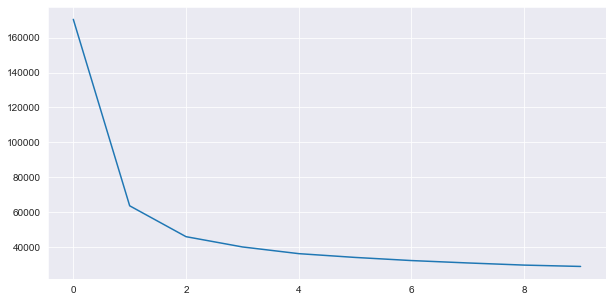

In [157]:
#Elbow Method
inertia = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=123)
    kmeans.fit(df_task2.values)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10,5))
plt.plot(inertia)

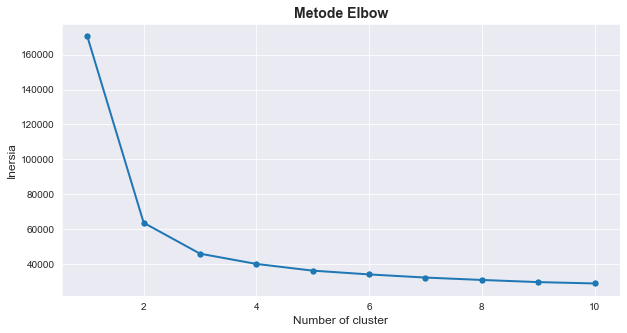

In [183]:
#Visualisasi Metode Elbow
plt.figure(figsize=(10,5))
sns.lineplot(x=range(1,11),y=inertia,linewidth=2)
sns.scatterplot(x=range(1,11),y=inertia,s=50)
plt.title('Metode Elbow',fontsize=14,fontweight='bold')
plt.xlabel('Number of cluster',fontsize=12)
plt.ylabel('Inersia',fontsize=12)
plt.show()

In [159]:
kmeans2 = KMeans(n_clusters=2,init='k-means++',max_iter=300,n_init=10,random_state=123)
kmeans2.fit(df_task2.values)

KMeans(n_clusters=2, random_state=123)

In [160]:
df_task2['km_labels'] = kmeans2.labels_

In [161]:
df_task2

,Education,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,Response,Age,Transaction,status_Bertunangan,status_Cerai,status_Duda,status_Janda,status_Lajang,status_Menikah,km_labels
0,-0.457733,0.234063,-0.823039,-0.928972,0.310532,0.978226,1.549429,1.690227,2.454568,1.484827,...,1,0.986443,25,0,0,0,0,1,0,0
1,-0.457733,-0.234559,1.039938,0.909066,-0.380509,-0.872024,-0.637328,-0.717986,-0.651038,-0.633880,...,0,1.236801,6,0,0,0,0,1,0,1
2,-0.457733,0.769478,-0.823039,-0.928972,-0.795134,0.358511,0.569159,-0.178368,1.340203,-0.146821,...,0,0.318822,21,1,0,0,0,0,0,0
3,-0.457733,-1.017239,1.039938,-0.928972,-0.795134,-0.872024,-0.561922,-0.655551,-0.504892,-0.585174,...,0,-1.266777,8,1,0,0,0,0,0,1
4,1.533113,0.240221,1.039938,-0.928972,1.554407,-0.391671,0.418348,-0.218505,0.152766,-0.000703,...,0,-1.016420,19,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,-0.457733,0.356642,-0.823039,0.909066,-0.104093,1.197646,0.418348,0.066913,0.079693,2.215416,...,0,0.151917,18,0,0,0,0,0,1,0
2236,1.533113,0.467539,2.902916,0.909066,0.241428,0.299208,-0.662463,-0.610954,-0.687574,-0.658233,...,0,1.904422,22,1,0,0,0,0,0,0
2237,-0.457733,0.188091,-0.823039,-0.928972,1.450751,1.787710,0.544024,0.223001,-0.102990,-0.365998,...,0,-1.016420,19,0,1,0,0,0,0,0
2238,0.537690,0.675388,-0.823039,0.909066,-1.417072,0.364441,0.091591,0.209622,0.773887,0.072356,...,0,1.069896,23,1,0,0,0,0,0,0


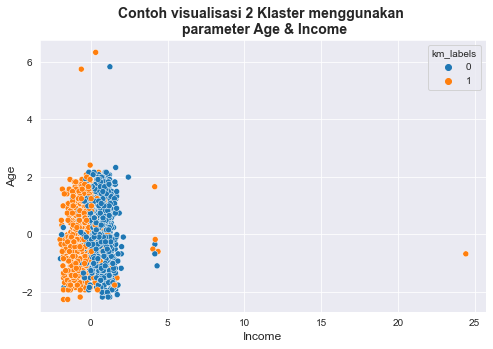

In [195]:
#scatter plot berdasarkan clustering
plt.figure(figsize=(8,5))

sns.scatterplot(data=df_task2,x='Income',y='Age',hue='km_labels')
plt.title('Contoh visualisasi 2 Klaster menggunakan \n parameter Age & Income',fontsize=14,fontweight='bold')
plt.xlabel('Income',fontsize=12)
plt.ylabel('Age',fontsize=12)
plt.show()

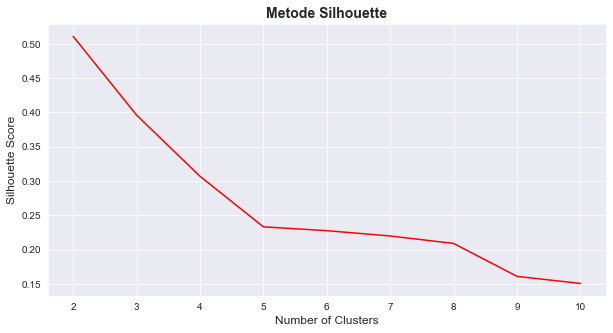

In [201]:
# Metode silhouette
silhouette_scores = []
for n_cluster in range(2, 11):
    kmeans = KMeans(n_clusters=n_cluster).fit(df_task2)
    silhouette_scores.append(silhouette_score(df_task2, kmeans.labels_))

plt.figure(figsize=(10,5))    
plt.plot(range(2, 11), silhouette_scores,color='r')

plt.title('Metode Silhouette',fontweight='bold',fontsize=14)
plt.xlabel('Number of Clusters',fontsize=12)
plt.ylabel('Silhouette Score',fontsize=12)
plt.show()


#### Skor silhouette berkisar dari -1 hingga 1, dengan nilai positif yang lebih tinggi menunjukkan kualitas klasterisasi yang lebih baik.

In [165]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(df_task2)

KMeans(n_clusters=2)

In [166]:
score = silhouette_score(df_task2, kmeans.labels_)
print('Silhouette Score:', score)

Silhouette Score: 0.5109946820879694
